## Ensemble Techniques Project Submission

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

The data consists of those diagnosed with Parkinson Disease and those who do not.

### Attributes

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 


In [1]:
#Import the basic data management and visualization libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Q1 Load the Data Set

In [2]:
#Load the local copy of the dataset

parkinson_df = pd.read_table("parkinsons.data",sep=",")

#sanity check
parkinson_df.sample(5).T

,9,184,154,92,112
name,phon_R01_S02_4,phon_R01_S49_2,phon_R01_S37_2,phon_R01_S22_2,phon_R01_S26_4
MDVP:Fo(Hz),95.056,116.848,119.1,148.272,204.664
MDVP:Fhi(Hz),120.103,217.552,128.442,164.989,221.3
MDVP:Flo(Hz),91.226,99.503,88.833,142.299,189.621
MDVP:Jitter(%),0.00532,0.00531,0.00692,0.00459,0.00841
MDVP:Jitter(Abs),6e-05,5e-05,6e-05,3e-05,4e-05
MDVP:RAP,0.00268,0.0026,0.00393,0.0025,0.00502
MDVP:PPQ,0.00332,0.00346,0.003,0.00256,0.00485
Jitter:DDP,0.00803,0.0078,0.01179,0.0075,0.01506
MDVP:Shimmer,0.02838,0.01795,0.02682,0.0419,0.02378


In [3]:
##Keep a base copy for use later if needed without reloading
parkinson_df_base = parkinson_df.copy()

#### Q2 It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. 

Data is examined from various dimensions below

In [4]:
#Shape of the dataset
print("Shape of the parkinson data set :",parkinson_df.shape)

#There are 195 records with 24 columns

Shape of the parkinson data set : (195, 24)


In [5]:
#Get the datatypes and general idea of the records
print("Info of the dataset :\n")
print(parkinson_df.info())

#There does not seem to be any missing values per se..we need to check if the values makes sense
#Name is of type object as expected
#status is our dependent variable and seems to be encoded already as int
#Rest of the features are all floats indicating continous distribution

#Even though we have 195 records ..considering that there are 23 features we may have some challenges with respect
#to overfitting. we need to see which are more influential and drop others
#Any observations around the feature distribution etc also need to be cautious since the number of records is small
#There could be lot of correlated features based on the descriptions of the features
#for example we have the absolute value and % for MDVP:Jitter

Info of the dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2       

In [6]:
#Check describe to see how it looks
parkinson_df.describe().T

#The different features have very wide range among their means..need to see if the big valued ones dominate
#spread1 is all negative
#MDVP:frequencies seems to have lot of variance based on std dev and min and max values
#Lot of values are very close to zero

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


Status distribution :
 1    147
0     48
Name: status, dtype: int64


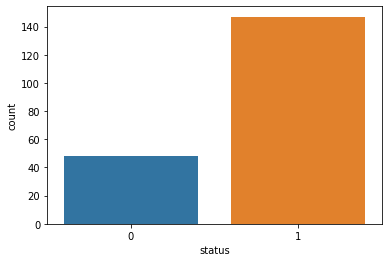

In [7]:
#Check the distribution of status
#status 0 indicates healthy and 1 indicates parkinsons

print("Status distribution :\n",parkinson_df["status"].value_counts())

#Visualize the same
plt.figure(figsize=(6,4))
sns.countplot(parkinson_df["status"])

#dataset has more samples of people with parkinsons than healthy. (almost 3:1)
#We will need to see how this affects recall values

In [8]:
##"Null" Rate
#For comparison lets calculate what the null rate will be
print(f"Null Rate : {parkinson_df.status.mean() :0.3f}")

#Model accuracy of null model is around 75%. We need to assess our model performance in light of this and recall values

Null Rate : 0.754


#### Q3 Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

Univariate analysis and bivariate analysis performed below

In [9]:
##Univariate and bi-variate analyis of the features
#We will check the distribution and check the box plots wrt to status

Skew of MDVP:Fo(Hz) :  0.592


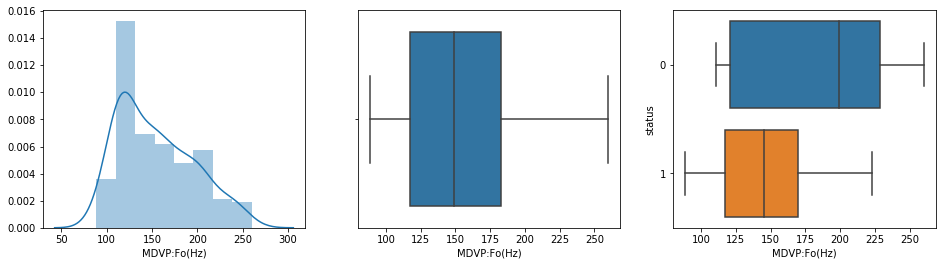

In [10]:
#MDVP:Fo(Hz)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:Fo(Hz)"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["MDVP:Fo(Hz)"],ax=ax2)
sns.distplot(parkinson_df["MDVP:Fo(Hz)"],ax=ax1)
print(f'Skew of MDVP:Fo(Hz) : {parkinson_df["MDVP:Fo(Hz)"].skew() : .3f}')
      
#Right skewed unimodal distribution
#We can see PD cases have lower values though it is not clear indication as seen in the box plot
#No outlier is seen

Skew of MDVP:Fhi(Hz) :  2.542


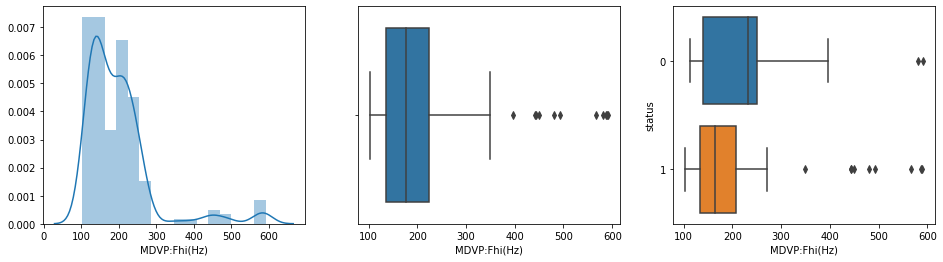

In [11]:
#MDVP:Fhi(Hz)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:Fhi(Hz)"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(parkinson_df["MDVP:Fhi(Hz)"],ax=ax2)
sns.distplot(parkinson_df["MDVP:Fhi(Hz)"],ax=ax1)
print(f'Skew of MDVP:Fhi(Hz) : {parkinson_df["MDVP:Fhi(Hz)"].skew() : .3f}')
      
#Very Right skewed multimodal distribution with several outliers
#Probably indicates several sub groups
#Again PD cases have lower values generally but no straightforward distinction as there are several outliers as well

In [12]:
#Lets check the outliers for MDVP:Fhi(Hz)
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:Fhi(Hz)"].quantile(0.25)
Q3 = parkinson_df["MDVP:Fhi(Hz)"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:Fhi(Hz)"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:Fhi(Hz)"] < Q1 - 1.5*IQR)]\
[["MDVP:Fhi(Hz)","status"]]

#There are 11 records...and it is across both status.
#Since the number of records is not many we will probably retain this in the base feature set
#Also not enough to seperate them and treat differently

,MDVP:Fhi(Hz),status
73,588.518,1
102,586.567,1
115,492.892,1
116,442.557,1
117,450.247,1
118,442.824,1
120,479.697,1
149,565.740,1
186,592.030,0
187,581.289,0


Skew of MDVP:Flo(Hz) :  1.217


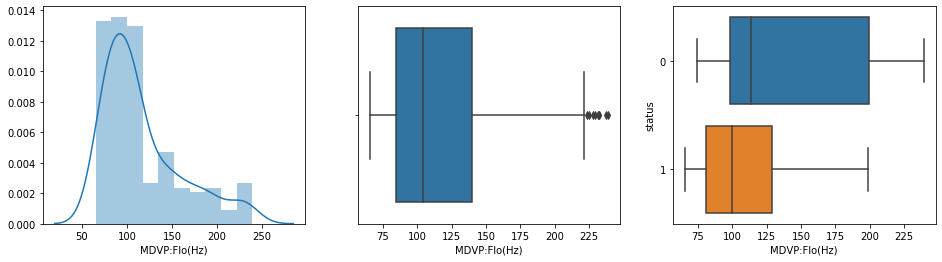

In [13]:
#MDVP:Flo(Hz)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:Flo(Hz)"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(parkinson_df["MDVP:Flo(Hz)"],ax=ax2)
sns.distplot(parkinson_df["MDVP:Flo(Hz)"],ax=ax1)
print(f'Skew of MDVP:Flo(Hz) : {parkinson_df["MDVP:Flo(Hz)"].skew() : .3f}')
      
#Very Right skewed multimodal distribution with several outliers
#Probably indicates several sub groups again
#Again PD cases generally have lower values and are around a narrower range than healthy cases

In [14]:
#Lets check the outliers for MDVP:Flo(Hz)
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:Flo(Hz)"].quantile(0.25)
Q3 = parkinson_df["MDVP:Flo(Hz)"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:Flo(Hz)"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:Flo(Hz)"] < Q1 - 1.5*IQR)]\
[["MDVP:Flo(Hz)","status"]]

#Again just 8 records so we will not do any treatment and retain them as is

,MDVP:Flo(Hz),status
42,225.227,0
43,232.483,0
44,232.435,0
45,227.911,0
46,231.848,0
63,223.634,0
166,229.256,0
167,237.303,0
170,239.170,0


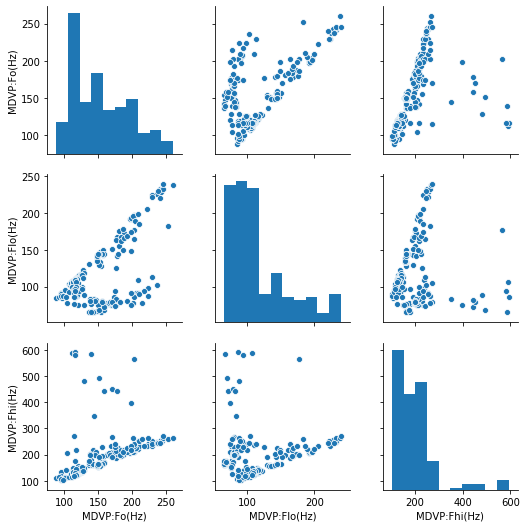

In [15]:
#Check how the MDVP:Fo(Hz), MDVP:Flo(Hz), MDVP:Fhi(Hz) are related
sns.pairplot(parkinson_df[["MDVP:Fo(Hz)","MDVP:Flo(Hz)","MDVP:Fhi(Hz)"]])

#Not very strong correlations but some trending seen

Skew of MDVP:Jitter(%) :  3.085


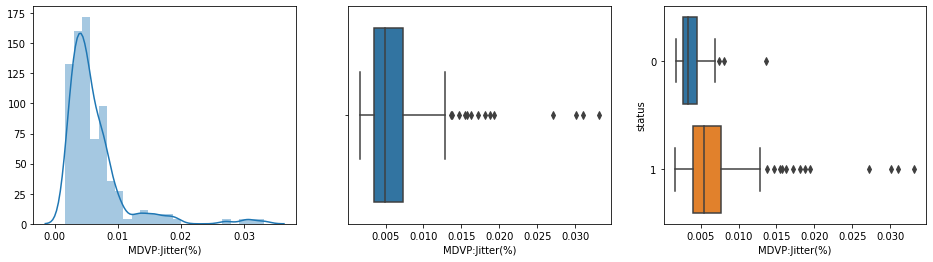

In [16]:
#MDVP:Jitter(%)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:Jitter(%)"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["MDVP:Jitter(%)"],ax=ax2)
sns.distplot(parkinson_df["MDVP:Jitter(%)"],ax=ax1)
print(f'Skew of MDVP:Jitter(%) : {parkinson_df["MDVP:Jitter(%)"].skew() : .3f}')
      
#Extreme Right skewed multimodal distribution with several outliers
#Again probably indicates several sub groups
#Here non PD cases seem to be on the lower side eventhough there are some outliers
#Values are generally in a narrow range

In [17]:
#Lets check the outliers for MDVP:Jitter(%)
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:Jitter(%)"].quantile(0.25)
Q3 = parkinson_df["MDVP:Jitter(%)"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:Jitter(%)"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:Jitter(%)"] < Q1 - 1.5*IQR)]\
[["MDVP:Jitter(%)","status"]]

#14 records...again we will for now retain these. 

,MDVP:Jitter(%),status
98,0.01378,1
99,0.01936,1
100,0.03316,1
101,0.01551,1
102,0.03011,1
146,0.01568,1
147,0.01466,1
148,0.01719,1
149,0.01627,1
150,0.01872,1


Skew of MDVP:Jitter(Abs) :  2.649


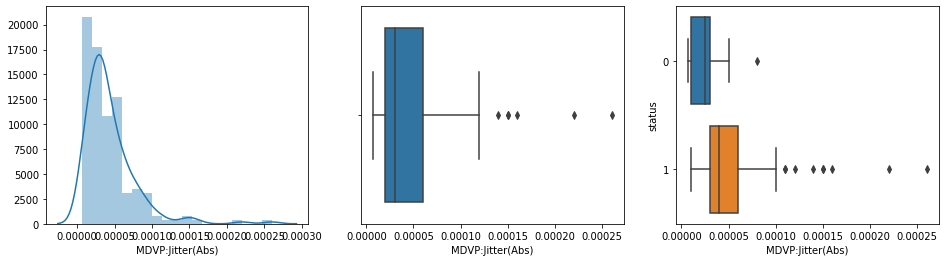

In [18]:
#MDVP:Jitter(Abs) ..probably similar to MDVP:Jitter(%)
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:Jitter(Abs)"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["MDVP:Jitter(Abs)"],ax=ax2)
sns.distplot(parkinson_df["MDVP:Jitter(Abs)"],ax=ax1)
print(f'Skew of MDVP:Jitter(Abs) : {parkinson_df["MDVP:Jitter(Abs)"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#Similar to the % values non PD cases seem to have lower values and narrow range mostly. 
#PD cases seem to be slightly higher values with several high values outliers

In [19]:
#Lets check the outliers for MDVP:Jitter(Abs)
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:Jitter(Abs)"].quantile(0.25)
Q3 = parkinson_df["MDVP:Jitter(Abs)"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:Jitter(Abs)"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:Jitter(Abs)"] < Q1 - 1.5*IQR)]\
[["MDVP:Jitter(Abs)","status"]]

#6 records all with PD..need to retain for now

,MDVP:Jitter(Abs),status
99,0.00015,1
100,0.00026,1
102,0.00022,1
151,0.00016,1
152,0.00014,1
157,0.00015,1


Skew of MDVP:RAP :  3.361


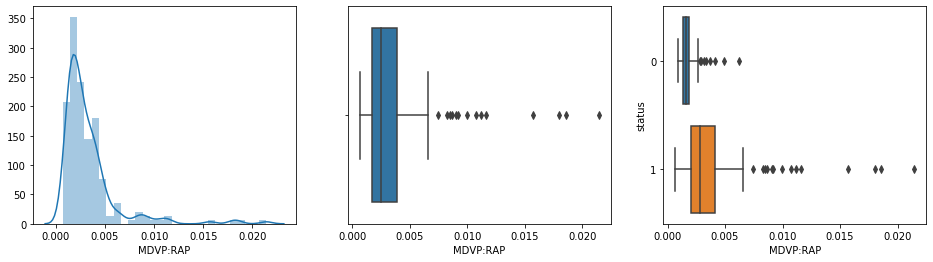

In [20]:
#MDVP:RAP
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:RAP"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["MDVP:RAP"],ax=ax2)
sns.distplot(parkinson_df["MDVP:RAP"],ax=ax1)
print(f'Skew of MDVP:RAP : {parkinson_df["MDVP:RAP"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#Non PD cases seem to be clustered around a very narrow range (even with several outliers)
#PD cases have a jump in the values and more outliers

In [21]:
#Lets check the outliers for MDVP:RAP
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:RAP"].quantile(0.25)
Q3 = parkinson_df["MDVP:RAP"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:RAP"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:RAP"] < Q1 - 1.5*IQR)]\
[["MDVP:RAP","status"]]

#14 records..all PD

,MDVP:RAP,status
97,0.00743,1
98,0.00826,1
99,0.01159,1
100,0.02144,1
101,0.00905,1
102,0.01854,1
146,0.00863,1
147,0.00849,1
148,0.00996,1
149,0.00919,1


Skew of MDVP:PPQ :  3.074


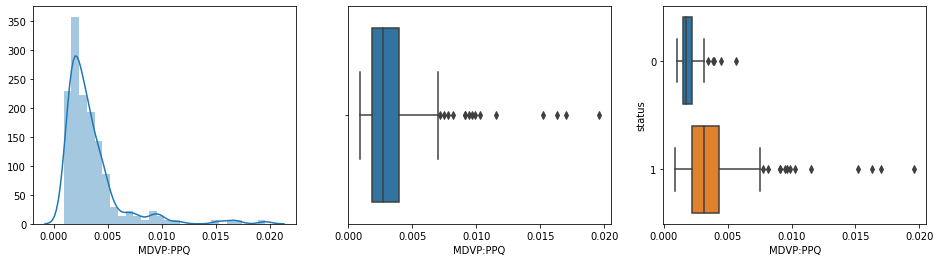

In [22]:
#MDVP:PPQ
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:PPQ"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["MDVP:PPQ"],ax=ax2)
sns.distplot(parkinson_df["MDVP:PPQ"],ax=ax1)
print(f'Skew of MDVP:PPQ : {parkinson_df["MDVP:PPQ"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#Again based on boxplots we see a jump in the values of PD cases with several outliers

In [23]:
#Lets check the outliers for MDVP:PPQ
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:PPQ"].quantile(0.25)
Q3 = parkinson_df["MDVP:PPQ"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:PPQ"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:PPQ"] < Q1 - 1.5*IQR)]\
[["MDVP:PPQ","status"]]

#14 records..all PD

,MDVP:PPQ,status
2,0.00781,1
4,0.00908,1
5,0.00750,1
99,0.00990,1
100,0.01522,1
101,0.00909,1
102,0.01628,1
146,0.00946,1
147,0.00819,1
148,0.01027,1


Skew of Jitter:DDP :  3.362


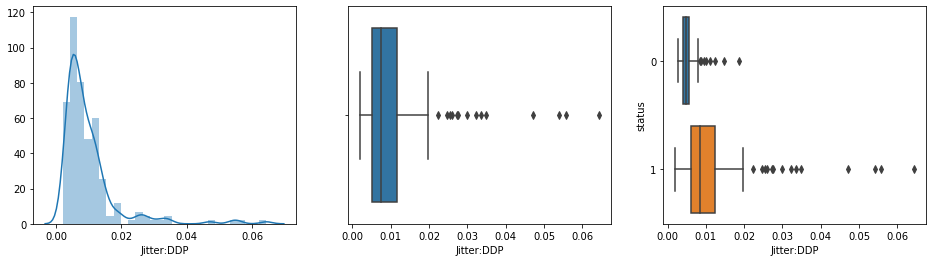

In [24]:
#Jitter:DDP
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["Jitter:DDP"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["Jitter:DDP"],ax=ax2)
sns.distplot(parkinson_df["Jitter:DDP"],ax=ax1)
print(f'Skew of Jitter:DDP : {parkinson_df["Jitter:DDP"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#Similar to PPQ based on boxplots we see a jump in the values of PD cases with several outliers

In [25]:
#Lets check the outliers for Jitter:DDP
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["Jitter:DDP"].quantile(0.25)
Q3 = parkinson_df["Jitter:DDP"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["Jitter:DDP"] > Q3 + 1.5*IQR) | (parkinson_df["Jitter:DDP"] < Q1 - 1.5*IQR)]\
[["Jitter:DDP","status"]]

#14 records..all PD

,Jitter:DDP,status
97,0.02228,1
98,0.02478,1
99,0.03476,1
100,0.06433,1
101,0.02716,1
102,0.05563,1
146,0.02589,1
147,0.02546,1
148,0.02987,1
149,0.02756,1


Skew of MDVP:Shimmer :  1.666


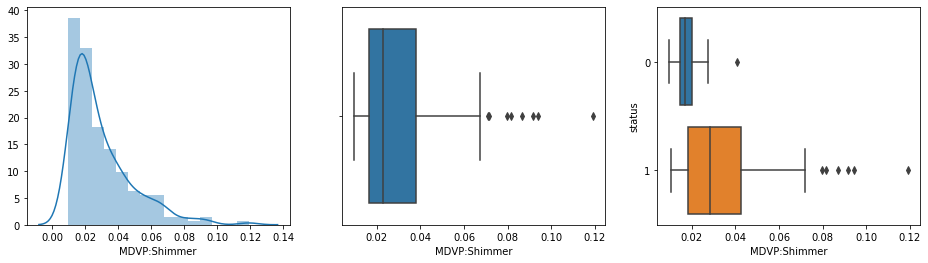

In [26]:
#MDVP:Shimmer
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:Shimmer"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["MDVP:Shimmer"],ax=ax2)
sns.distplot(parkinson_df["MDVP:Shimmer"],ax=ax1)
print(f'Skew of MDVP:Shimmer : {parkinson_df["MDVP:Shimmer"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#Like the previous features we can again see PD cases having a jump in the values while the non PD cases
#have values in a narrow range

In [27]:
#Lets check the outliers for Jitter:DDP
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:Shimmer"].quantile(0.25)
Q3 = parkinson_df["MDVP:Shimmer"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:Shimmer"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:Shimmer"] < Q1 - 1.5*IQR)]\
[["MDVP:Shimmer","status"]]

#8 records..all PD

,MDVP:Shimmer,status
91,0.07959,1
100,0.09178,1
102,0.09419,1
146,0.08143,1
148,0.07118,1
149,0.07170,1
151,0.11908,1
152,0.08684,1


Skew of MDVP:Shimmer(dB) :  1.999


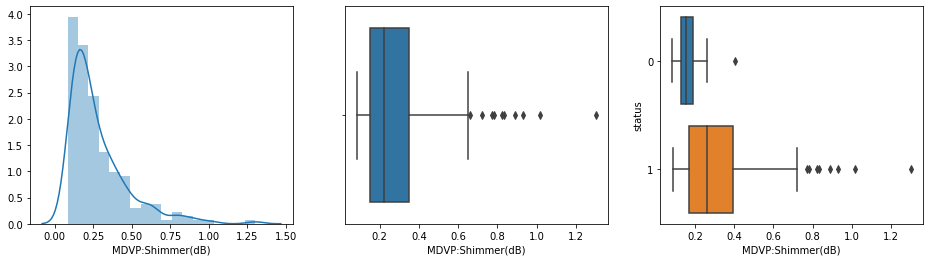

In [28]:
#MDVP:Shimmer(dB)..probably same as MDVP:Shimmer
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:Shimmer(dB)"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["MDVP:Shimmer(dB)"],ax=ax2)
sns.distplot(parkinson_df["MDVP:Shimmer(dB)"],ax=ax1)
print(f'Skew of MDVP:Shimmer(dB) : {parkinson_df["MDVP:Shimmer(dB)"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#As expected this is similar to MDVP: Shimmer

In [29]:
#Lets check the outliers for Jitter:DDP
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:Shimmer(dB)"].quantile(0.25)
Q3 = parkinson_df["MDVP:Shimmer(dB)"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:Shimmer(dB)"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:Shimmer(dB)"] < Q1 - 1.5*IQR)]\
[["MDVP:Shimmer(dB)","status"]]

#8 records..same records as MDVP:Shimmer...we could most likely remove this straight away..high correlation

,MDVP:Shimmer(dB),status
91,0.772,1
99,0.659,1
100,0.891,1
102,0.930,1
146,0.821,1
148,0.722,1
149,0.833,1
150,0.784,1
151,1.302,1
152,1.018,1


Skew of Shimmer:APQ3 :  1.581


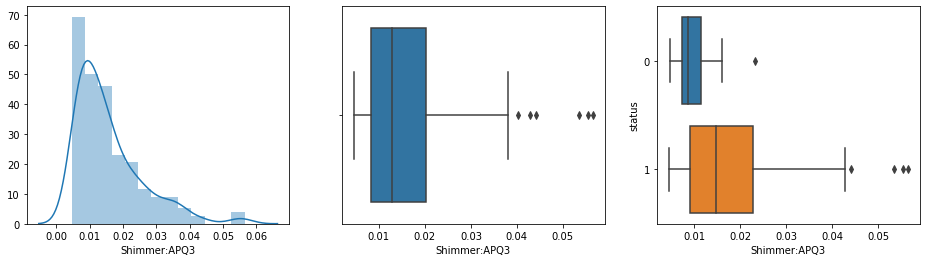

In [30]:
#Shimmer:APQ3 
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["Shimmer:APQ3"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["Shimmer:APQ3"],ax=ax2)
sns.distplot(parkinson_df["Shimmer:APQ3"],ax=ax1)
print(f'Skew of Shimmer:APQ3 : {parkinson_df["Shimmer:APQ3"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#As seen in the values so far PD cases have higher values generally
#Healthy cases are around a narrow lower range

In [31]:
#Lets check the outliers for Shimmer:APQ3
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["Shimmer:APQ3"].quantile(0.25)
Q3 = parkinson_df["Shimmer:APQ3"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["Shimmer:APQ3"] > Q3 + 1.5*IQR) | (parkinson_df["Shimmer:APQ3"] < Q1 - 1.5*IQR)]\
[["Shimmer:APQ3","status"]]

#6 records..again all PD cases

,Shimmer:APQ3,status
91,0.04421,1
100,0.05358,1
102,0.05551,1
141,0.04016,1
151,0.05647,1
152,0.04284,1


Skew of Shimmer:APQ5 :  1.799


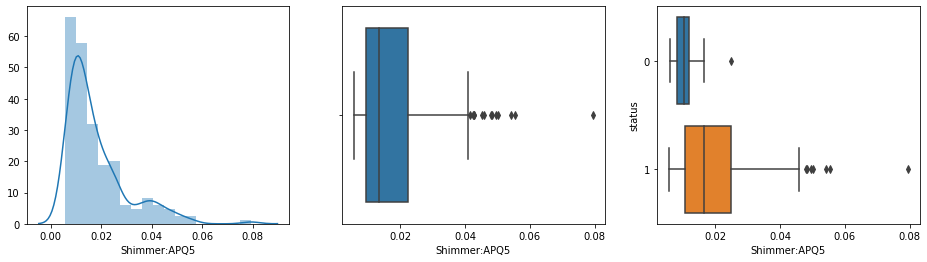

In [32]:
#Shimmer:APQ5 
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["Shimmer:APQ5"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["Shimmer:APQ5"],ax=ax2)
sns.distplot(parkinson_df["Shimmer:APQ5"],ax=ax1)
print(f'Skew of Shimmer:APQ5 : {parkinson_df["Shimmer:APQ5"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#Very similar to APQ3

In [33]:
#Lets check the outliers for Shimmer:APQ5
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["Shimmer:APQ5"].quantile(0.25)
Q3 = parkinson_df["Shimmer:APQ5"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["Shimmer:APQ5"] > Q3 + 1.5*IQR) | (parkinson_df["Shimmer:APQ5"] < Q1 - 1.5*IQR)]\
[["Shimmer:APQ5","status"]]

#13 records..again all PD cases

,Shimmer:APQ5,status
1,0.04518,1
4,0.04825,1
87,0.04159,1
88,0.04254,1
90,0.04282,1
91,0.04962,1
100,0.04791,1
102,0.05005,1
146,0.05426,1
148,0.04580,1


Skew of MDVP:APQ :  2.618


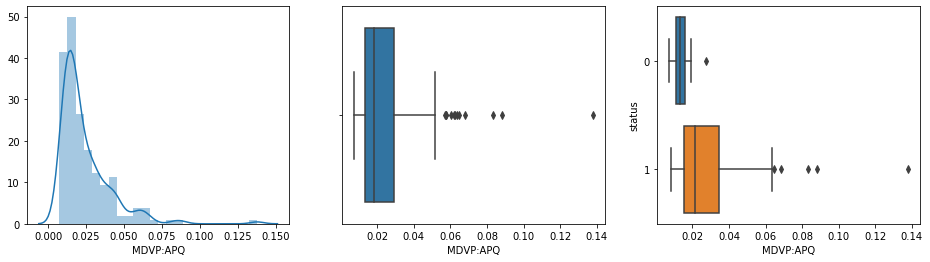

In [34]:
#MDVP:APQ
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["MDVP:APQ"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["MDVP:APQ"],ax=ax2)
sns.distplot(parkinson_df["MDVP:APQ"],ax=ax1)
print(f'Skew of MDVP:APQ : {parkinson_df["MDVP:APQ"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#Similar to the other APQ measures...we need to check the correlations among these

In [35]:
#Lets check the outliers for MDVP:APQ
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["MDVP:APQ"].quantile(0.25)
Q3 = parkinson_df["MDVP:APQ"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["MDVP:APQ"] > Q3 + 1.5*IQR) | (parkinson_df["MDVP:APQ"] < Q1 - 1.5*IQR)]\
[["MDVP:APQ","status"]]

#12 records..again all PD cases..

,MDVP:APQ,status
18,0.05767,1
91,0.05690,1
99,0.05783,1
100,0.06196,1
102,0.06023,1
146,0.08808,1
147,0.06359,1
148,0.06824,1
149,0.06460,1
150,0.06259,1


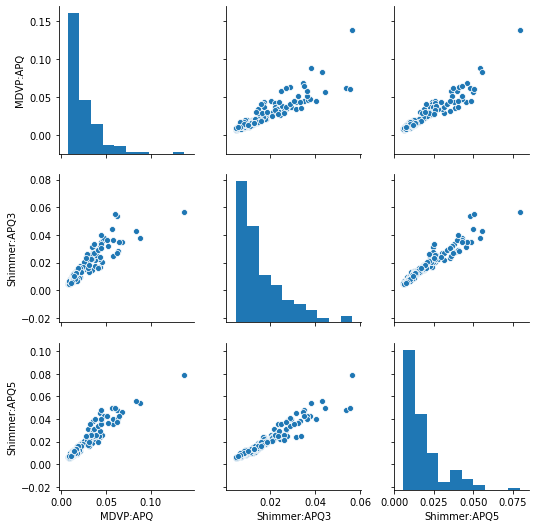

In [36]:
#Check the correlation among APQs..looks very similar
sns.pairplot(data=parkinson_df[["MDVP:APQ","Shimmer:APQ3","Shimmer:APQ5"]])

#high coorelation seen

Skew of Shimmer:DDA :  1.581


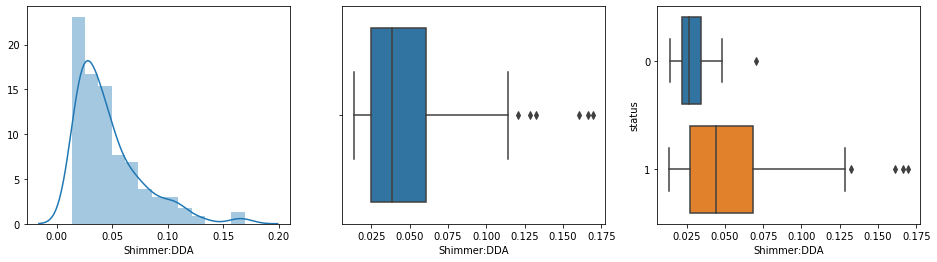

In [37]:
#Shimmer:DDA
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["Shimmer:DDA"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["Shimmer:DDA"],ax=ax2)
sns.distplot(parkinson_df["Shimmer:DDA"],ax=ax1)
print(f'Skew of Shimmer:DDA : {parkinson_df["Shimmer:DDA"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#Keeping with the trend of other values the box plot distribution is similar to other features

In [38]:
#Lets check the outliers for Shimmer:DDA
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["Shimmer:DDA"].quantile(0.25)
Q3 = parkinson_df["Shimmer:DDA"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["Shimmer:DDA"] > Q3 + 1.5*IQR) | (parkinson_df["Shimmer:DDA"] < Q1 - 1.5*IQR)]\
[["Shimmer:DDA","status"]]

#6 records..again all PD cases..also same as Shimmer:APQ3..probably we can remove one of them if correlated

,Shimmer:DDA,status
91,0.13262,1
100,0.16074,1
102,0.16654,1
141,0.12047,1
151,0.16942,1
152,0.12851,1


Skew of NHR :  4.221


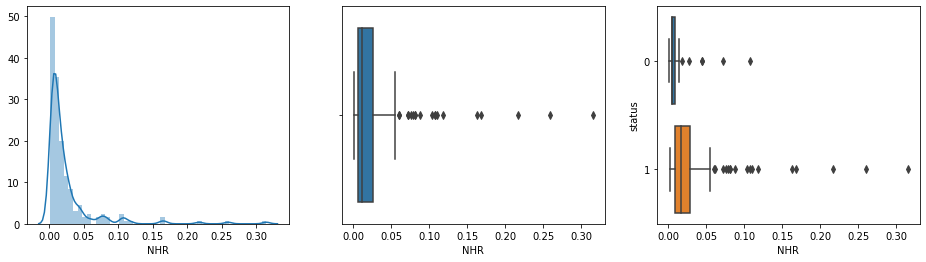

In [39]:
#NHR
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["NHR"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["NHR"],ax=ax2)
sns.distplot(parkinson_df["NHR"],ax=ax1)
print(f'Skew of NHR : {parkinson_df["NHR"].skew() : .3f}')
      
#Extreme Right skewed distribution with several outliers
#The values seem to be in a very narrow range
#PD cases seem to have noticeable jump in the values and outliers

In [40]:
#Lets check the outliers for NHR
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["NHR"].quantile(0.25)
Q3 = parkinson_df["NHR"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["NHR"] > Q3 + 1.5*IQR) | (parkinson_df["NHR"] < Q1 - 1.5*IQR)]\
[["NHR","status"]]

#29 records..not all PD cases though

,NHR,status
89,0.07223,1
90,0.08725,1
97,0.08151,1
98,0.10323,1
99,0.16744,1
100,0.31482,1
101,0.11843,1
102,0.25930,1
115,0.06051,1
146,0.07530,1


Skew of HNR : -0.514


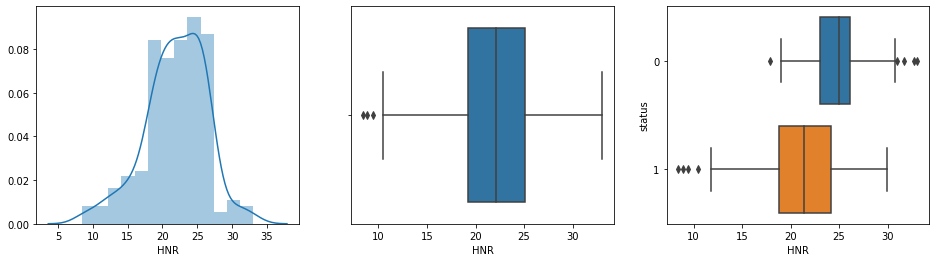

In [41]:
#HNR
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["HNR"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["HNR"],ax=ax2)
sns.distplot(parkinson_df["HNR"],ax=ax1)
print(f'Skew of HNR : {parkinson_df["HNR"].skew() : .3f}')
      
#Left skewed distribution with several outliers and is multimodal
#Seems very different from the others
#Breaking with the trend this seem to be reverse in the distribution of values
#PD cases seem to be dropping from the normal range

In [42]:
#Lets check the outliers for HNR
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["HNR"].quantile(0.25)
Q3 = parkinson_df["HNR"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["HNR"] > Q3 + 1.5*IQR) | (parkinson_df["HNR"] < Q1 - 1.5*IQR)]\
[["HNR","status"]]

#3 records..but again all PD cases

,HNR,status
100,8.867,1
151,8.441,1
152,9.449,1


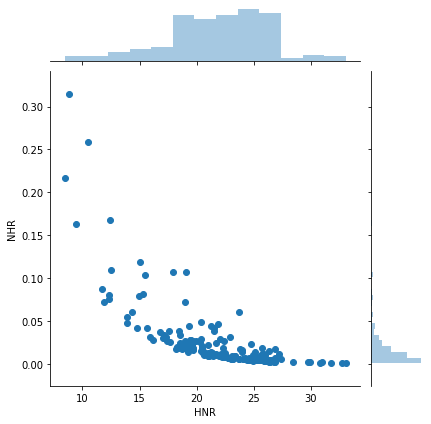

In [43]:
#HNR and NHR
sns.jointplot(data=parkinson_df,x="HNR",y="NHR")

#Some weak negative correlation observed

Skew of RPDE : -0.143


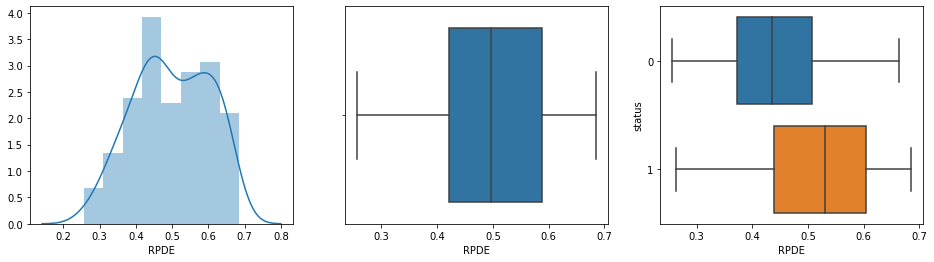

In [44]:
#RPDE
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["RPDE"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["RPDE"],ax=ax2)
sns.distplot(parkinson_df["RPDE"],ax=ax1)
print(f'Skew of RPDE : {parkinson_df["RPDE"].skew() : .3f}')
      
#Left skewed distribution with no outliers seen
#We can still see the trend of PD cases having slightly higer values
#No outliers seen

Skew of DFA : -0.033


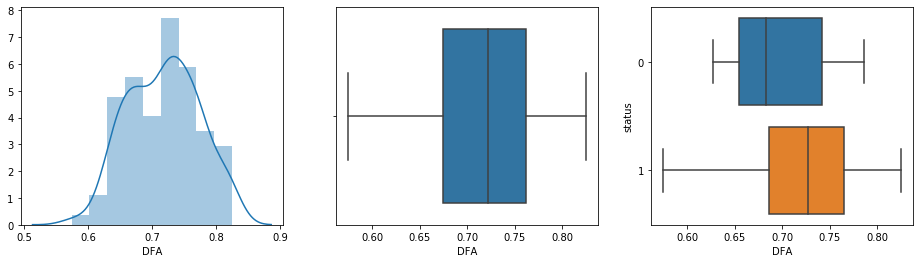

In [45]:
#DFA
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["DFA"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["DFA"],ax=ax2)
sns.distplot(parkinson_df["DFA"],ax=ax1)
print(f'Skew of DFA : {parkinson_df["DFA"].skew() : .3f}')
      
#Slight Left skewed distribution with no outliers seen..somewhat approaching little bit of normal distribution
#Boxplots indicate that in line with the general trend PD cases seem to be having values on the higher side
#There is however lot of overlap among the values

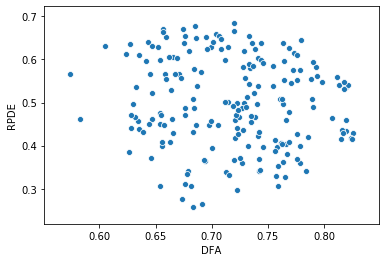

In [46]:
#Just checking how DFA and RPDE are seen together
sns.scatterplot(parkinson_df["DFA"],parkinson_df["RPDE"])

#No correlation

Skew of spread1 :  0.432


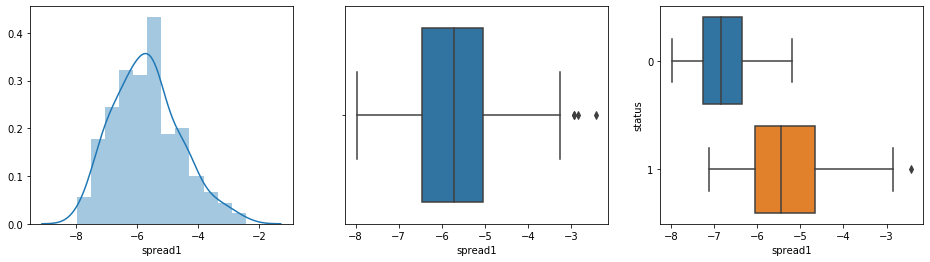

In [47]:
#spread1
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["spread1"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["spread1"],ax=ax2)
sns.distplot(parkinson_df["spread1"],ax=ax1)
print(f'Skew of spread1 : {parkinson_df["spread1"].skew() : .3f}')
      
#Slight right skewed distribution with 3 outliers seen..somewhat approaching little bit of normal
#From the boxplots we can very clearly see PD cases having generally higher values

In [48]:
#Lets check the outliers for spread1
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["spread1"].quantile(0.25)
Q3 = parkinson_df["spread1"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["spread1"] > Q3 + 1.5*IQR) | (parkinson_df["spread1"] < Q1 - 1.5*IQR)]\
[["spread1","status"]]

#3 records..but again all PD cases

,spread1,status
17,-2.931070,1
151,-2.434031,1
152,-2.839756,1
164,-2.929379,1


Skew of spread2 :  0.144


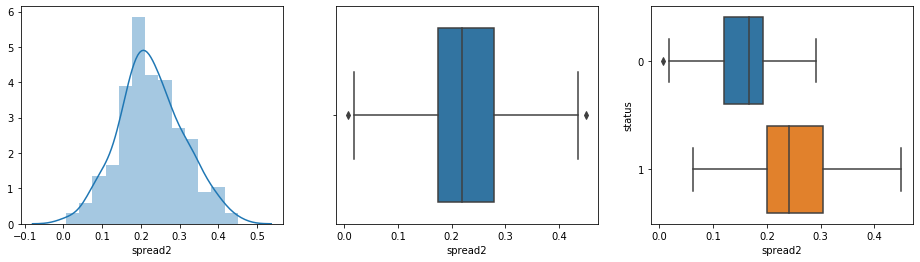

In [49]:
#spread2
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["spread2"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["spread2"],ax=ax2)
sns.distplot(parkinson_df["spread2"],ax=ax1)
print(f'Skew of spread2 : {parkinson_df["spread2"].skew() : .3f}')
      
#Almost approaching normal distribution with very very slight skew
#Box plot indicates similar trends as seen in most of the othe features

In [50]:
#Lets check the outliers for spread2
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["spread2"].quantile(0.25)
Q3 = parkinson_df["spread2"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["spread2"] > Q3 + 1.5*IQR) | (parkinson_df["spread2"] < Q1 - 1.5*IQR)]\
[["spread2","status"]]

#2 records..on both sides of the distribution..

,spread2,status
65,0.006274,0
151,0.450493,1


Skew of D2 :  0.430


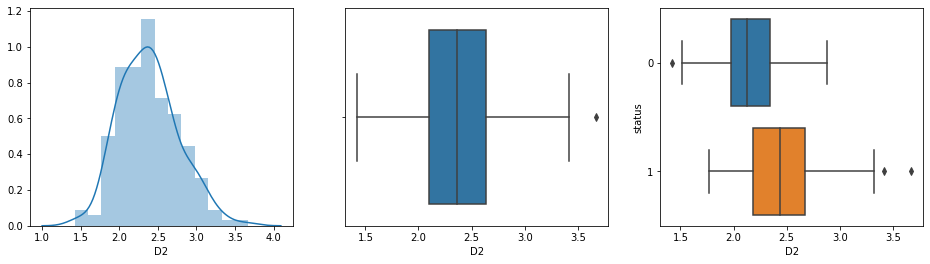

In [51]:
#D2
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["D2"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["D2"],ax=ax2)
sns.distplot(parkinson_df["D2"],ax=ax1)
print(f'Skew of D2 : {parkinson_df["D2"].skew() : .3f}')
      
#Almost approaching normal distribution with very very slight skew with just one outlier
#Again box plots look very familiar to other features

In [52]:
#Lets check the outliers for D2
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["D2"].quantile(0.25)
Q3 = parkinson_df["D2"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["D2"] > Q3 + 1.5*IQR) | (parkinson_df["D2"] < Q1 - 1.5*IQR)]\
[["D2","status"]]

#1 record from PD cases

,D2,status
89,3.671155,1


Skew of PPE :  0.430


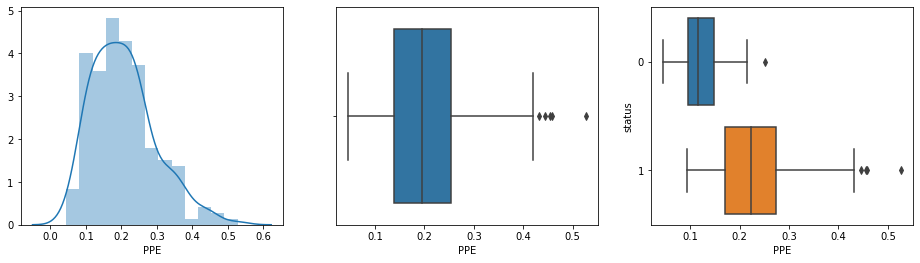

In [53]:
#PPE
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))
sns.boxplot(x=parkinson_df["PPE"],y=parkinson_df["status"].astype("category"),ax=ax3)
sns.boxplot(x=parkinson_df["PPE"],ax=ax2)
sns.distplot(parkinson_df["PPE"],ax=ax1)
print(f'Skew of PPE : {parkinson_df["D2"].skew() : .3f}')
      
#Almost approaching normal distribution with very very slight skew with just few outliers
#Very clearly the PD cases have higher values including several outliers

In [54]:
#Lets check the outliers for PPE
#calculate the quartiles and use the IQR range
Q1 = parkinson_df["PPE"].quantile(0.25)
Q3 = parkinson_df["PPE"].quantile(0.75)
IQR =  Q3 - Q1
#Get the outlier records and status
parkinson_df[(parkinson_df["PPE"] > Q3 + 1.5*IQR) | (parkinson_df["PPE"] < Q1 - 1.5*IQR)]\
[["PPE","status"]]

#5 record..again all PD cases

,PPE,status
17,0.430788,1
102,0.444774,1
146,0.457533,1
151,0.527367,1
152,0.454721,1


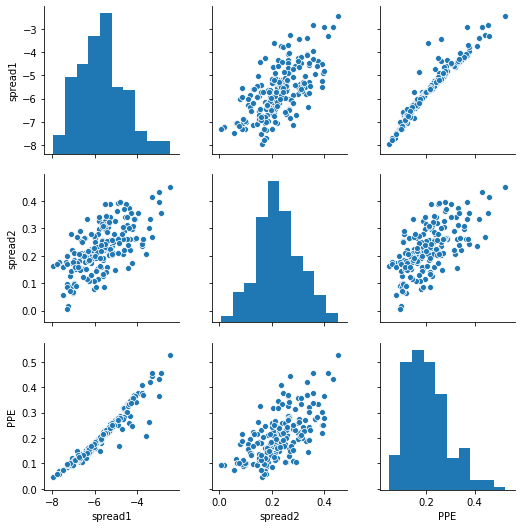

In [55]:
#Lets check spread1, spread2, PPE, D2
sns.pairplot(data=parkinson_df[["spread1","spread2","PPE"]])

#Very high coorelation seen among spread1 and PPE

In [56]:
##Lets check the correlations
parkinson_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


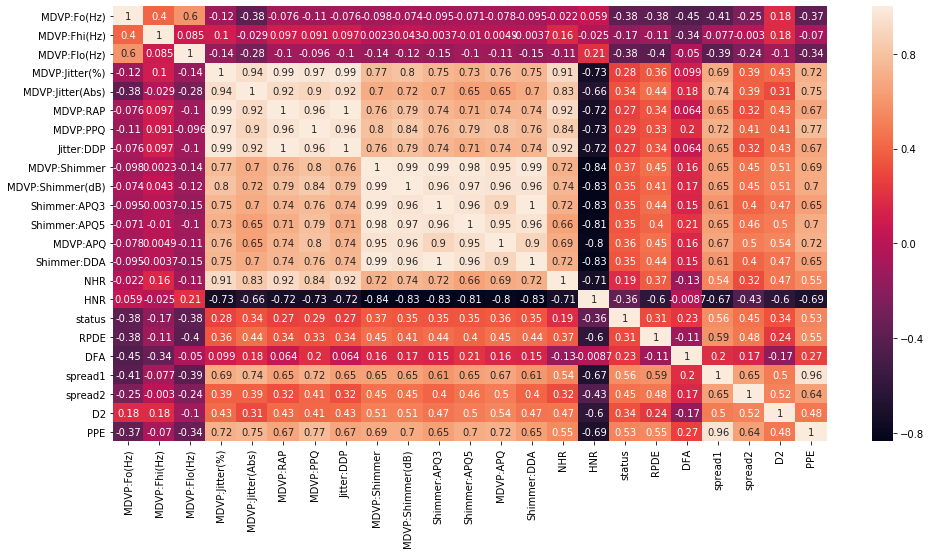

In [57]:
##Heatmap for visualizing
plt.figure(figsize=(16,8))
sns.heatmap(parkinson_df.corr(),annot=True)

#As expected lot of correlated features

In [58]:
#Check for correlation among features..we can clearly see two major groups of correlated features
corr_matrix = parkinson_df.corr()

#Convoluted way to get only the entries with correlation coeffiecent more than certain threshold..just for ease of reading
corr_matrix[(corr_matrix > 0.90) & (corr_matrix < 1)].dropna(how="all",axis=0).dropna(how="all",axis=1)

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,spread1,PPE
MDVP:Jitter(%),NaN,0.935714,0.990276,0.974256,0.990276,NaN,NaN,NaN,NaN,NaN,NaN,0.906959,NaN,NaN
MDVP:Jitter(Abs),0.935714,NaN,0.922911,NaN,0.922913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:RAP,0.990276,0.922911,NaN,0.957317,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.919521,NaN,NaN
MDVP:PPQ,0.974256,NaN,0.957317,NaN,0.957319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jitter:DDP,0.990276,0.922913,1.000000,0.957319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919548,NaN,NaN
MDVP:Shimmer,NaN,NaN,NaN,NaN,NaN,NaN,0.987258,0.987625,0.982835,0.950083,0.987626,NaN,NaN,NaN
MDVP:Shimmer(dB),NaN,NaN,NaN,NaN,NaN,0.987258,NaN,0.963198,0.973751,0.960977,0.963202,NaN,NaN,NaN
Shimmer:APQ3,NaN,NaN,NaN,NaN,NaN,0.987625,0.963198,NaN,0.960070,NaN,1.000000,NaN,NaN,NaN
Shimmer:APQ5,NaN,NaN,NaN,NaN,NaN,0.982835,0.973751,0.960070,NaN,0.949146,0.960072,NaN,NaN,NaN
MDVP:APQ,NaN,NaN,NaN,NaN,NaN,0.950083,0.960977,NaN,0.949146,NaN,NaN,NaN,NaN,NaN


In [59]:
###We can drop several features based purely on the correlation analysis

#The below group is highly correlated and we need to retain only one of them
#MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP
#Lets retain only MDVP:Jitter(Abs) based on its relation with status seen below

#Second group which is highly correlated
#MDVP:Shimmer, MDVP:Shimmer(dB),Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA 
#Lets retain only MDVP:Shimmer based on relation with status seen below

#spread1 and PPE are also correlated - lets retain only PPE

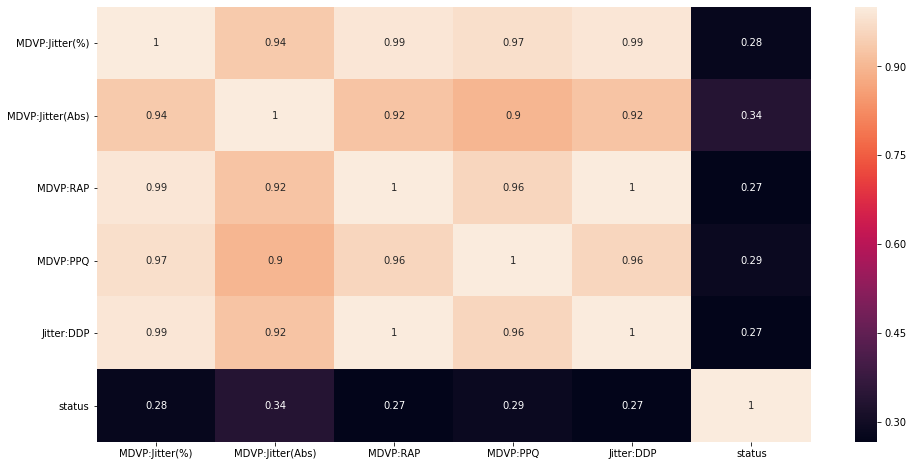

In [60]:
#Checking the group again and their relation with status
plt.figure(figsize=(16,8))
sns.heatmap(parkinson_df[["MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP",\
                          "MDVP:PPQ","Jitter:DDP","status"]].corr(),annot=True)

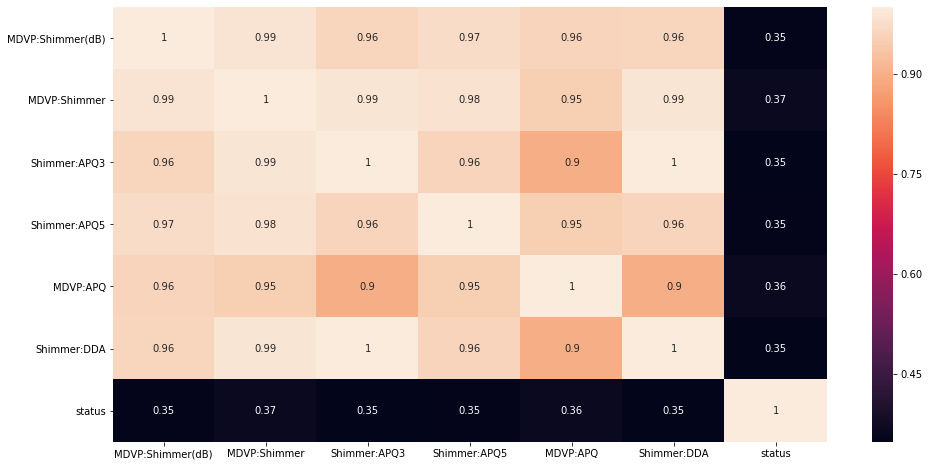

In [61]:
#Checking the group again and their relation with status
plt.figure(figsize=(16,8))
sns.heatmap(parkinson_df[["MDVP:Shimmer(dB)","MDVP:Shimmer","Shimmer:APQ3",\
                          "Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","status"]].corr(),annot=True)

In [62]:
#Drop the correlated features and check again

    
drop_features = ["MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","spread1","MDVP:Shimmer(dB)",\
                 "Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA"]
parkinson_df.drop(drop_features,axis=1,inplace=True)

#sanity check
parkinson_df.head(2)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00007,0.04374,0.02211,21.033,1,0.414783,0.815285,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00008,0.06134,0.01929,19.085,1,0.458359,0.819521,0.335590,2.486855,0.368674


In [63]:
#Lets also drop the name column as it may not serve any purpose
parkinson_df.drop("name",axis=1,inplace=True)

#sanity check
parkinson_df.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:Shimmer,NHR,HNR,status,RPDE,DFA,spread2,D2,PPE
0,119.992,157.302,74.997,0.00007,0.04374,0.02211,21.033,1,0.414783,0.815285,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00008,0.06134,0.01929,19.085,1,0.458359,0.819521,0.335590,2.486855,0.368674


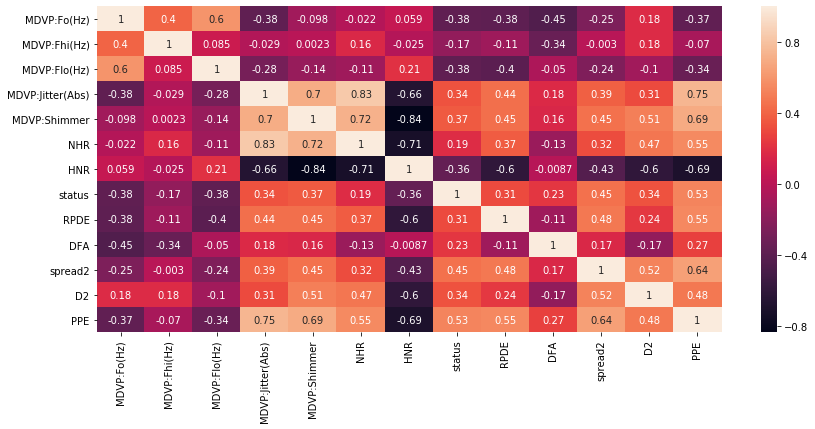

In [64]:
#Lets check the correlation again
plt.figure(figsize=(14,6))
sns.heatmap(parkinson_df.corr(),annot=True)

#There is some negative correlation b/w HNR and MDVP:Shimmer buts lets proceed further before dropping

In [65]:
#Check the shape and features remaining
print("Shape of dataset after cleaning :",parkinson_df.shape)
print("Info : \n",parkinson_df.info())

#12 features remain in addition to the status dependent variable

Shape of dataset after cleaning : (195, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:Shimmer        195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null float64
dtypes: float64(12), int64(1)
memory usage: 19.9 KB
Info : 
 None


In [66]:
##Model preprocessing and data splits

In [67]:
#Import the needed libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
#Initialize model comparison df..will be used for visualization later
model_scores = pd.DataFrame(columns=["name","cv"])

#Change name dtype to category
model_scores["name"] = model_scores["name"].astype("category")

In [69]:
#Extract the features and dependent variables seperately
y=parkinson_df["status"]
X=parkinson_df.drop("status",axis=1)

#sanity
print(f"y shape: {y.shape}\n sample records\n {y.head(2).T}")
print(f"X shape: {X.shape}\n sample records\n {X.head(2).T}")

y shape: (195,)
 sample records
 0    1
1    1
Name: status, dtype: int64
X shape: (195, 12)
 sample records
                            0           1
MDVP:Fo(Hz)       119.992000  122.400000
MDVP:Fhi(Hz)      157.302000  148.650000
MDVP:Flo(Hz)       74.997000  113.819000
MDVP:Jitter(Abs)    0.000070    0.000080
MDVP:Shimmer        0.043740    0.061340
NHR                 0.022110    0.019290
HNR                21.033000   19.085000
RPDE                0.414783    0.458359
DFA                 0.815285    0.819521
spread2             0.266482    0.335590
D2                  2.301442    2.486855
PPE                 0.284654    0.368674


#### Q4 Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [70]:
#Split the data into test and training sets
#Assuming 70:30 split
#Random seed for repeatability
test_split = 0.3
seed = 9999
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

#Sanity
print(f"y_train shape: {y_train.shape}\n sample records \n{y_train.head(2)}")
print(f"X_train shape: {X_train.shape}\n sample records \n{X_train.head(2).T}")
print(f"y_test shape: {y_test.shape}\n sample records \n{y_test.head(2)}")
print(f"X_test shape: {X_test.shape}\n sample records \n{X_test.head(2).T}")

y_train shape: (136,)
 sample records 
66    1
75    1
Name: status, dtype: int64
X_train shape: (136, 12)
 sample records 
                          66          75
MDVP:Fo(Hz)       140.341000  110.707000
MDVP:Fhi(Hz)      159.774000  122.611000
MDVP:Flo(Hz)       67.021000  105.007000
MDVP:Jitter(Abs)    0.000060    0.000050
MDVP:Shimmer        0.031980    0.022150
NHR                 0.021830    0.004720
HNR                19.560000   25.197000
RPDE                0.460139    0.463514
DFA                 0.720908    0.807217
spread2             0.226850    0.315074
D2                  2.359973    1.862092
PPE                 0.226156    0.228624
y_test shape: (59,)
 sample records 
145    1
190    0
Name: status, dtype: int64
X_test shape: (59, 12)
 sample records 
                         145         190
MDVP:Fo(Hz)       223.361000  174.188000
MDVP:Fhi(Hz)      263.872000  230.978000
MDVP:Flo(Hz)       87.638000   94.261000
MDVP:Jitter(Abs)    0.000020    0.000030
MDVP:Shimmer    

#### Q5 Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [71]:
##Lets build a decision tree with criteria as entropy and no regularization parameters
tree_model = DecisionTreeClassifier(criterion="entropy",random_state=seed)

#### Q6 Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab.

In [72]:
#Fit and evaluate
tree_model.fit(X_train,y_train)

#Keep for later evaluation
y_pred = tree_model.predict(X_test)

y_train_pred = tree_model.predict(X_train)

print("Decision Tree Classifier:\n")
print(f"Training Data Accuracy Score {accuracy_score(y_train,y_train_pred)}")
print(f"Overall Test Accuracy Score {accuracy_score(y_test,y_pred) : .3f}")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred)) #cross tab
print("Classfication Metrics: \n",classification_report(y_test,y_pred))


#We can see the training accuracy is 100% as expected from full tree
#From the test accuracy we can see that there is overfitting happening
#Need to check the cross validated average accuracy as this tree is prone to variance based on training dataset picked

Decision Tree Classifier:

Training Data Accuracy Score 1.0
Overall Test Accuracy Score  0.881
Confusion Matrix: 
 [[16  3]
 [ 4 36]]
Classfication Metrics: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.92      0.90      0.91        40

    accuracy                           0.88        59
   macro avg       0.86      0.87      0.87        59
weighted avg       0.88      0.88      0.88        59



In [73]:
#Lets check the model flexibility and average accuracy scores by performing a cross validation
#We will do repeated stratifiedKfold
from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedStratifiedKFold

In [74]:
#Cross validation to check the model robustness

rskfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=seed)
cv_accuracy = cross_val_score(tree_model,X,y,cv=rskfold,scoring="accuracy")
cv_recall = cross_val_score(tree_model,X,y,cv=rskfold,scoring="recall")
print("Cross Validation Accuracy Results: \n",cv_accuracy)
print("Cross Validation Recall Results: \n",cv_recall)

Cross Validation Accuracy Results: 
 [0.95       0.9        0.87179487 0.86842105 0.86842105 0.875
 0.9        0.87179487 0.76315789 0.89473684 0.9        0.875
 0.92307692 0.81578947 0.78947368 0.925      0.775      0.76923077
 0.92105263 0.86842105 0.925      0.85       0.8974359  0.81578947
 0.84210526 0.9        0.9        0.82051282 0.94736842 0.81578947
 0.9        0.9        0.82051282 0.84210526 0.84210526 0.85
 0.825      0.8974359  0.81578947 0.86842105 0.85       0.725
 0.82051282 0.94736842 0.78947368 0.875      0.875      0.82051282
 0.73684211 0.94736842]
Cross Validation Recall Results: 
 [1.         0.93333333 0.86206897 0.89655172 0.93103448 0.93333333
 0.93333333 0.93103448 0.75862069 0.89655172 0.96666667 0.93333333
 0.93103448 0.86206897 0.75862069 0.96666667 0.86666667 0.82758621
 0.93103448 0.96551724 0.93333333 0.96666667 0.93103448 0.82758621
 0.79310345 0.96666667 0.9        0.96551724 1.         0.86206897
 0.9        0.96666667 0.89655172 0.86206897 0.9310344

In [75]:
#Get the average cross validated scores and std. deviation
print(f"Average cross validated accuracy score : {cv_accuracy.mean() : .3}")
print(f"Std. Deviation cross validated accuracy score : {cv_accuracy.std() : .3}")

print(f"Average cross validated recall score : {cv_recall.mean() : .3}")
print(f"Std. Deviation cross validated recall score : {cv_recall.std() : .3}")

Average cross validated accuracy score :  0.86
Std. Deviation cross validated accuracy score :  0.0545
Average cross validated recall score :  0.898
Std. Deviation cross validated recall score :  0.0693


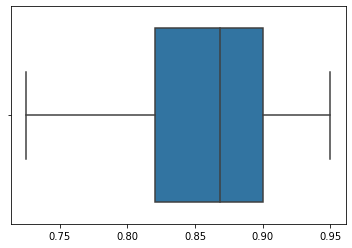

In [76]:
#Box plot to check the results
model_scores = model_scores.append({"name": "Normal Tree","cv": cv_accuracy},ignore_index=True)
sns.boxplot(cv_accuracy)

In [77]:
#Overall accuracy in this run is 86% (cross validated)
#Recall value for PD cases is 90%.
#Lets see if we can improve with regularization
#There is overfitting seen as observed based on the training and test scores
#We can also observe the accuracy variance based on training set picked indicating high model variance

In [78]:
##Check the tree model characteristics and feature importances
print("Feature Importances from Normal Decision Tree Classifier\n")
pd.DataFrame(tree_model.feature_importances_,columns=["Feat Imp Value"],index=X.columns)\
.sort_values("Feat Imp Value",ascending=False)

#7 features were used from the list
#Since the number of samples are less it is natural that all the features were not used

Feature Importances from Normal Decision Tree Classifier



,Feat Imp Value
PPE,0.306825
MDVP:Shimmer,0.219543
MDVP:Fo(Hz),0.209954
MDVP:Jitter(Abs),0.113855
D2,0.067714
HNR,0.042768
RPDE,0.039340
MDVP:Fhi(Hz),0.000000
MDVP:Flo(Hz),0.000000
NHR,0.000000


In [79]:
#Lets visualize the tree to see what happened...also to compare after regularization
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

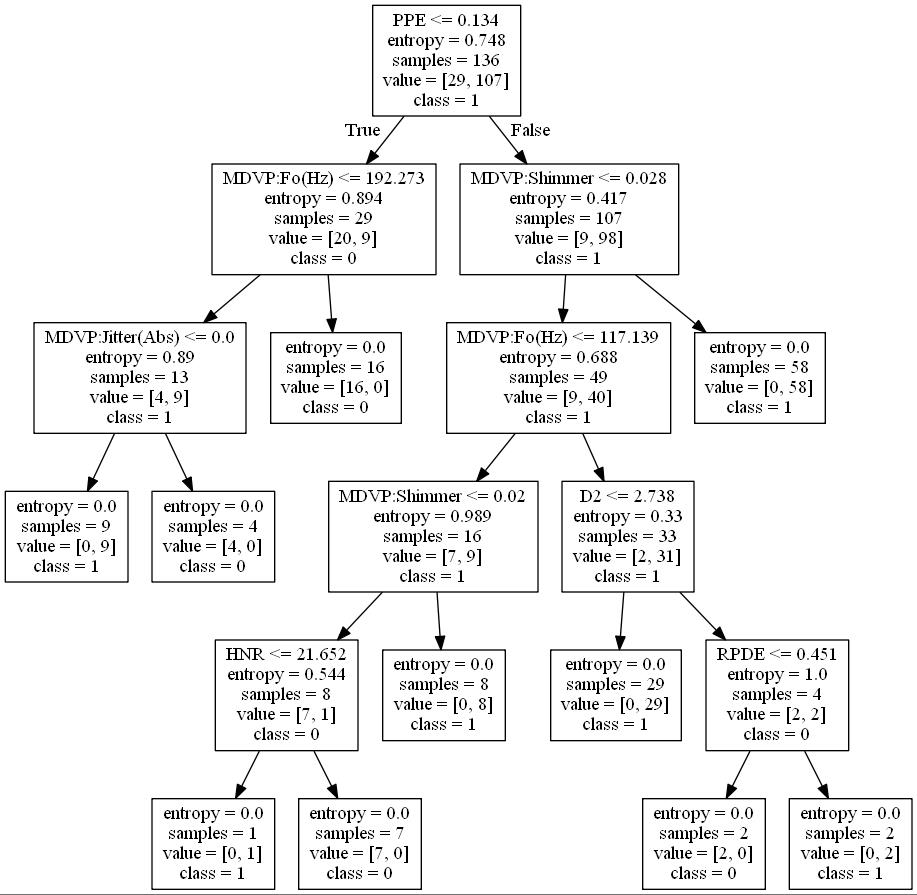

In [80]:
tree_dot = export_graphviz(tree_model,class_names=["0","1"],feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(tree_dot)
Image(graph.create_jpg())

#Since the no of records are less the tree did not really use all the features and grow in depth before stopping

In [81]:
#Tree Depth with the unregularized tree
tree_model.get_depth()

5

#### Q7 Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [82]:
#Lets try to regularize the tree and see if how the performance is affected
#We will pick a max_depth and min_sample_leaf values for now and later determine the best

reg_tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_leaf=6,random_state=seed)

In [83]:
#Fit and evaluate
reg_tree_model.fit(X_train,y_train)

#Keep for later evaluation
y_pred_reg = reg_tree_model.predict(X_test)
y_train_pred_reg = reg_tree_model.predict(X_train)

print("Regularized Decision Tree Classifier:\n")
print(f"Training Data Accuracy Score {accuracy_score(y_train,y_train_pred_reg) : 0.3f}")
print(f"Overall Test Accuracy Score {accuracy_score(y_test,y_pred_reg) :0.3f}")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_reg))
print("Classfication Metrics: \n",classification_report(y_test,y_pred_reg))



Regularized Decision Tree Classifier:

Training Data Accuracy Score  0.963
Overall Test Accuracy Score 0.898
Confusion Matrix: 
 [[15  4]
 [ 2 38]]
Classfication Metrics: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.95      0.93        40

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



In [84]:
#Lets check the model flexibility by performing a cross validation
rskfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=seed)
cv_accuracy_reg = cross_val_score(reg_tree_model,X,y,cv=rskfold,scoring="accuracy")
cv_recall_reg = cross_val_score(reg_tree_model,X,y,cv=rskfold,scoring="recall")
print("Cross Validation Accuracy Results: \n",cv_accuracy_reg)
print("Cross Validation Recall Results: \n",cv_recall_reg)

Cross Validation Accuracy Results: 
 [0.95       0.8        0.87179487 0.86842105 0.81578947 0.875
 0.9        0.92307692 0.73684211 0.84210526 0.9        0.8
 0.97435897 0.89473684 0.78947368 0.925      0.8        0.82051282
 0.94736842 0.81578947 0.95       0.85       0.87179487 0.81578947
 0.76315789 0.9        0.9        0.82051282 0.94736842 0.81578947
 0.85       0.925      0.79487179 0.76315789 0.89473684 0.9
 0.825      0.94871795 0.81578947 0.86842105 0.85       0.675
 0.92307692 0.94736842 0.81578947 0.825      0.775      0.79487179
 0.81578947 0.92105263]
Cross Validation Recall Results: 
 [1.         0.9        0.86206897 0.93103448 0.93103448 0.93333333
 0.93333333 0.96551724 0.75862069 0.93103448 0.93333333 0.9
 1.         0.93103448 0.79310345 1.         0.9        0.82758621
 0.96551724 0.89655172 0.96666667 1.         0.89655172 0.93103448
 0.75862069 0.93333333 0.9        0.89655172 1.         0.86206897
 0.86666667 0.96666667 0.89655172 0.75862069 0.96551724 0.9
 0.9

In [85]:
#Get the average cross validated scores and std. deviation
print(f"Average cross validated accuracy score : {cv_accuracy_reg.mean() : .3}")
print(f"Std. Deviation cross validated accuracy score : {cv_accuracy_reg.std() : .3}")

print(f"Average cross validated recall score : {cv_recall_reg.mean() : .3}")
print(f"Std. Deviation cross validated recall score : {cv_recall_reg.std() : .3}")


Average cross validated accuracy score :  0.856
Std. Deviation cross validated accuracy score :  0.0648
Average cross validated recall score :  0.904
Std. Deviation cross validated recall score :  0.0718


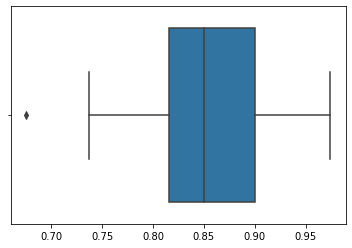

In [86]:
#Box plot to check the results
model_scores = model_scores.append({"name": "Regularized Normal Tree","cv": cv_accuracy_reg},ignore_index=True)
sns.boxplot(cv_accuracy_reg)

In [87]:
#Overall accuracy is now around 86% (cross validated)
#Recall value is around 90% 
#Accuracy seems to have not improved much with the regularization with these parameters
#However we can see that the overfitting which was happening earlier (training score was 100% earlier)
#is now reduced. We can see training score has reduced because of the model not trying to overfit
#Lets determine if there are better values for getting an improvement
#No of features used should have reduced as well

In [88]:
##Check the tree model characteristics and feature importances
print("Regualized Tree Feature Importances\n")
pd.DataFrame(reg_tree_model.feature_importances_,columns=["Feat Imp Value"],index=X.columns)\
.sort_values("Feat Imp Value",ascending=False)
#We can see the feature importance changing
#We can also see that only 4 features were used in achieving this accuracy..complexity has reduced
#Since the no of samples is low the accuracy may not improve more with regularization though overfitting is reduced
#and only most important features are used by this version of the tree

Regualized Tree Feature Importances



,Feat Imp Value
PPE,0.361458
MDVP:Shimmer,0.328925
MDVP:Fo(Hz),0.247338
spread2,0.062278
MDVP:Fhi(Hz),0.000000
MDVP:Flo(Hz),0.000000
MDVP:Jitter(Abs),0.000000
NHR,0.000000
HNR,0.000000
RPDE,0.000000


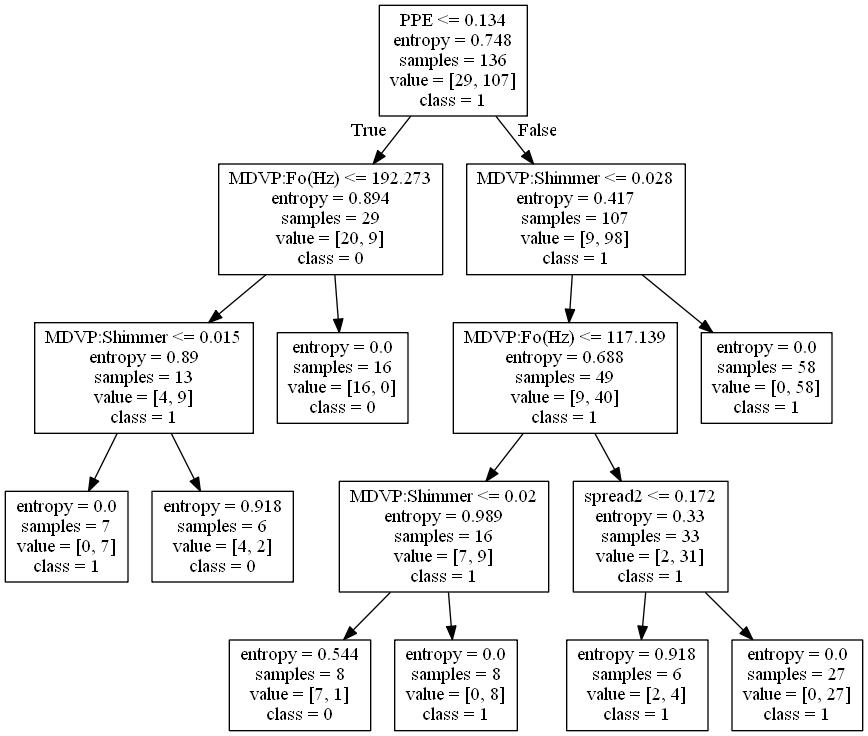

In [89]:
#Visualize and check the tree
reg_tree_dot = export_graphviz(reg_tree_model,class_names=["0","1"],feature_names=X.columns)
reg_graph = pydotplus.graph_from_dot_data(reg_tree_dot)
Image(reg_graph.create_jpg())

In [90]:
#Lets use gridsearch and see if we can determine the best parameters for the accuracy
from sklearn.model_selection import GridSearchCV

In [91]:
#Since max_depth was only 4 for the unregularized tree we will check for depth values from 2 to 6
#We will also search for min samples from 3 to 9
param_list = {"max_depth" : [x for x in range(2,6)],
              "min_samples_leaf" : [x for x in range(3,9)]}

In [92]:
#Initialize the gridsearch instance
gsv = GridSearchCV(reg_tree_model,param_grid=param_list,cv=5,scoring="accuracy")

In [93]:
#Fit and evaluate the best ones
gsv.fit(X_train,y_train)

C:\Users\rejimonr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=6,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=9999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8]},
             pre_d

In [94]:
#Check the parameter values which gave the best results
gsv.best_params_

{'max_depth': 5, 'min_samples_leaf': 6}

In [95]:
#Check the gridSearch results for the best score
gsv.best_score_

0.8823529411764706

In [96]:
#Lets rerun the regularized model again with the best estimator we got from above and see what happens to the results
#best_reg_tree_model = gsv.best_estimator_ //we will manually build it in this case for ease of reading

best_reg_tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=6,random_state=seed)

#Fit and evaluate
best_reg_tree_model.fit(X_train,y_train)

#Keep for later evaluation
y_pred_reg_best = best_reg_tree_model.predict(X_test)

y_pred_reg_best_train = best_reg_tree_model.predict(X_train)

print("Regularized Decision Tree Classifier with best parameters:\n")
print(f"Overall Test Accuracy Score {accuracy_score(y_train,y_pred_reg_best_train) :0.3f}")
print(f"Overall Test Accuracy Score {accuracy_score(y_test,y_pred_reg_best) :0.3f}")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_reg_best))
print("Classfication Metrics: \n",classification_report(y_test,y_pred_reg_best))

#
#Training score has reduced even more again indicating that the tree is reducing the overfitting

Regularized Decision Tree Classifier with best parameters:

Overall Test Accuracy Score 0.963
Overall Test Accuracy Score 0.898
Confusion Matrix: 
 [[15  4]
 [ 2 38]]
Classfication Metrics: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.95      0.93        40

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



In [97]:
#Lets check the model flexibility by performing a cross validation
rskfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=seed)
cv_accuracy_reg = cross_val_score(best_reg_tree_model,X,y,cv=rskfold,scoring="accuracy")
cv_recall_reg = cross_val_score(best_reg_tree_model,X,y,cv=rskfold,scoring="recall")
print("Cross Validation Accuracy Results: \n",cv_accuracy_reg)
print("Cross Validation Recall Results: \n",cv_recall_reg)

Cross Validation Accuracy Results: 
 [0.95       0.85       0.87179487 0.86842105 0.81578947 0.875
 0.9        0.92307692 0.73684211 0.86842105 0.9        0.8
 0.97435897 0.89473684 0.78947368 0.9        0.8        0.82051282
 0.94736842 0.84210526 0.875      0.875      0.87179487 0.84210526
 0.76315789 0.875      0.9        0.84615385 0.94736842 0.81578947
 0.775      0.925      0.82051282 0.76315789 0.89473684 0.9
 0.8        0.8974359  0.81578947 0.86842105 0.85       0.7
 0.92307692 0.94736842 0.81578947 0.775      0.9        0.84615385
 0.78947368 0.92105263]
Cross Validation Recall Results: 
 [1.         0.86666667 0.86206897 0.93103448 0.93103448 0.93333333
 0.93333333 0.96551724 0.75862069 0.89655172 0.93333333 0.9
 1.         0.93103448 0.79310345 0.93333333 0.9        0.82758621
 0.96551724 0.96551724 0.86666667 1.         0.89655172 0.86206897
 0.75862069 0.9        0.9        0.89655172 0.96551724 0.86206897
 0.73333333 0.96666667 0.93103448 0.75862069 0.96551724 0.9
 0.933

In [98]:
#Get the average cross validated scores and std. deviation
print(f"Average cross validated accuracy score : {cv_accuracy_reg.mean() : .3}")
print(f"Std. Deviation cross validated accuracy score : {cv_accuracy_reg.std() : .3}")

print(f"Average cross validated recall score : {cv_recall_reg.mean() : .3}")
print(f"Std. Deviation cross validated recall score : {cv_recall_reg.std() : .3}")

#Average score is still around 86% and recall is around 90%


Average cross validated accuracy score :  0.857
Std. Deviation cross validated accuracy score :  0.0602
Average cross validated recall score :  0.895
Std. Deviation cross validated recall score :  0.0742


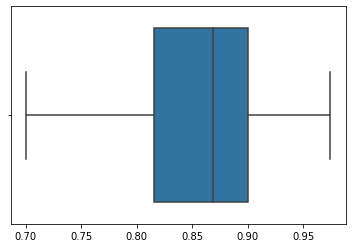

In [99]:
#Box plot to check the results
model_scores = model_scores.append({"name": "Regularized Normal Tree w/best parameters","cv": cv_accuracy_reg},ignore_index=True)
sns.boxplot(cv_accuracy_reg)

In [100]:
##Check the tree model characteristics and feature importances
print("Regualized Tree Feature Importances with best features\n")
pd.DataFrame(best_reg_tree_model.feature_importances_,columns=["Feat Imp Value"],index=X.columns)\
.sort_values("Feat Imp Value",ascending=False)
#We can see the feature importance changing
#We can also see that only 4 features were used

Regualized Tree Feature Importances with best features



,Feat Imp Value
PPE,0.361458
MDVP:Shimmer,0.328925
MDVP:Fo(Hz),0.247338
spread2,0.062278
MDVP:Fhi(Hz),0.000000
MDVP:Flo(Hz),0.000000
MDVP:Jitter(Abs),0.000000
NHR,0.000000
HNR,0.000000
RPDE,0.000000


In [101]:
##Lets try only with the max_depth parameter and see what happens
#Initialize the model
#Started with a random guess for max_depth but updated based on gridsearch later
tm_depth = DecisionTreeClassifier(criterion="entropy",max_depth=2,random_state=seed)

In [102]:
#Fit and evaluate
tm_depth.fit(X_train,y_train)

#test predictions
y_pred_tm = tm_depth.predict(X_test)

#train set prediction
y_pred_tm_train = tm_depth.predict(X_train)

print("Decition Tree Classifier with tree depth restrictions:\n")
print(f"Overall Training Data Accuracy Score {accuracy_score(y_train,y_pred_tm_train) : 0.3f}")
print(f"Overall Test Accuracy Score {accuracy_score(y_test,y_pred_tm) :0.3f}")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_tm))
print("Classfication Metrics: \n",classification_report(y_test,y_pred_tm))

#Overall accuracy seems to have reduced more

Decition Tree Classifier with tree depth restrictions:

Overall Training Data Accuracy Score  0.904
Overall Test Accuracy Score 0.814
Confusion Matrix: 
 [[ 9 10]
 [ 1 39]]
Classfication Metrics: 
               precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.80      0.97      0.88        40

    accuracy                           0.81        59
   macro avg       0.85      0.72      0.75        59
weighted avg       0.83      0.81      0.79        59



In [103]:
#Cross validation to check the performance..we will use 
rskfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=seed)
cv_accuracy = cross_val_score(tm_depth,X,y,cv=rskfold,scoring="accuracy")
cv_recall = cross_val_score(tm_depth,X,y,cv=rskfold,scoring="recall")
print("Cross Validation Accuracy Results: \n",cv_accuracy)
print("Cross Validation Recall Results: \n",cv_recall)

Cross Validation Accuracy Results: 
 [0.875      0.8        0.8974359  0.81578947 0.81578947 0.825
 0.775      0.82051282 0.78947368 0.84210526 0.85       0.875
 0.76923077 0.81578947 0.89473684 0.9        0.825      0.71794872
 0.86842105 0.81578947 0.85       0.825      0.87179487 0.78947368
 0.84210526 0.825      0.875      0.82051282 0.84210526 0.76315789
 0.9        0.875      0.79487179 0.76315789 0.73684211 0.825
 0.8        0.82051282 0.76315789 0.86842105 0.825      0.775
 0.82051282 0.92105263 0.81578947 0.875      0.85       0.79487179
 0.65789474 0.92105263]
Cross Validation Recall Results: 
 [1.         0.9        1.         0.96551724 0.93103448 1.
 0.86666667 1.         0.89655172 1.         0.9        0.93333333
 1.         0.93103448 0.96551724 1.         1.         0.93103448
 1.         0.96551724 0.96666667 1.         1.         1.
 0.89655172 0.9        0.96666667 0.89655172 1.         0.79310345
 0.96666667 0.96666667 0.96551724 0.79310345 0.96551724 0.93333333
 0

In [104]:
#Get the average cross validated scores and std. deviation
print(f"Average cross validated accuracy score : {cv_accuracy.mean() : .3}")
print(f"Std. Deviation cross validated accuracy score : {cv_accuracy.std() : .3}")

print(f"Average cross validated recall score : {cv_recall.mean() : .3}")
print(f"Std. Deviation cross validated recall score : {cv_recall.std() : .3}")

#Only with the depth parameter the average accuracy score has reduced

Average cross validated accuracy score :  0.826
Std. Deviation cross validated accuracy score :  0.0517
Average cross validated recall score :  0.946
Std. Deviation cross validated recall score :  0.0664


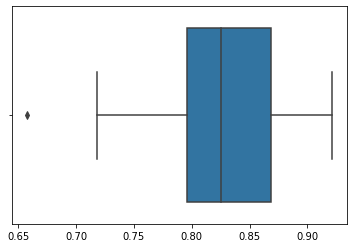

In [105]:
#boxplot to check the cv results
model_scores = model_scores.append({"name": "Regularized Normal Tree w/only depth","cv": cv_accuracy},ignore_index=True)
sns.boxplot(cv_accuracy)

In [106]:
#While overfitting decreased..the overall accuracy was reduced..
#Lets try grid search to see if we can get a best depth parameter
param_list = {"max_depth" : [x for x in range(2,6)]}

In [107]:
#Initialize and fit the data
gsv = GridSearchCV(tm_depth,param_grid=param_list,cv=5)

gsv.fit(X_train,y_train)

C:\Users\rejimonr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=9999,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [108]:
#Get the best parameters
gsv.best_params_

#Lets go back and run using 2 and see what happens

{'max_depth': 2}

In [109]:
#Best accuracy score
gsv.best_score_

0.8676470588235294

In [110]:
##Check the tree model characteristics and feature importances
print("Regualized Tree Feature Importances with best features\n")
pd.DataFrame(tm_depth.feature_importances_,columns=["Feat Imp Value"],index=X.columns)\
.sort_values("Feat Imp Value",ascending=False)

Regualized Tree Feature Importances with best features



,Feat Imp Value
PPE,0.553276
MDVP:Fo(Hz),0.254269
MDVP:Shimmer,0.192455
MDVP:Fhi(Hz),0.000000
MDVP:Flo(Hz),0.000000
MDVP:Jitter(Abs),0.000000
NHR,0.000000
HNR,0.000000
RPDE,0.000000
DFA,0.000000


In [111]:
#Depth alone is not helping improving the scoring..
#The number of features used is reduced..therfore model complexity is reduced and overfitting is reduced

In [112]:
#Lets try only with the min_sample_leaf parameter and see what happens
#Initialize the model
#Started with a random guess for max_depth but updated based on gridsearch later
tm_sample = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=3,random_state=seed)

In [113]:
#Fit and evaluate
tm_sample.fit(X_train,y_train)

#test predictions
y_pred_tm = tm_sample.predict(X_test)

#train set prediction
y_pred_tm_train = tm_sample.predict(X_train)

print("Decition Tree Classifier with tree depth restrictions:\n")
print(f"Overall Training Data Accuracy Score {accuracy_score(y_train,y_pred_tm_train) : 0.3f}")
print(f"Overall Test Accuracy Score {accuracy_score(y_test,y_pred_tm) :0.3f}")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_tm))
print("Classfication Metrics: \n",classification_report(y_test,y_pred_tm))

Decition Tree Classifier with tree depth restrictions:

Overall Training Data Accuracy Score  0.978
Overall Test Accuracy Score 0.847
Confusion Matrix: 
 [[16  3]
 [ 6 34]]
Classfication Metrics: 
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.92      0.85      0.88        40

    accuracy                           0.85        59
   macro avg       0.82      0.85      0.83        59
weighted avg       0.86      0.85      0.85        59



In [114]:
#Cross validation to check the performance..we will use 
rskfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=seed)
cv_accuracy = cross_val_score(tm_sample,X,y,cv=rskfold,scoring="accuracy")
cv_recall = cross_val_score(tm_sample,X,y,cv=rskfold,scoring="recall")
print("Cross Validation Accuracy Results: \n",cv_accuracy)
print("Cross Validation Recall Results: \n",cv_recall)

Cross Validation Accuracy Results: 
 [0.95       0.9        0.8974359  0.84210526 0.81578947 0.875
 0.85       0.84615385 0.71052632 0.86842105 0.875      0.85
 0.8974359  0.81578947 0.78947368 0.95       0.8        0.82051282
 0.86842105 0.86842105 0.875      0.875      0.8974359  0.84210526
 0.78947368 0.925      0.85       0.79487179 0.94736842 0.78947368
 0.9        0.9        0.87179487 0.86842105 0.84210526 0.825
 0.8        0.87179487 0.84210526 0.86842105 0.875      0.725
 0.8974359  0.94736842 0.78947368 0.825      0.9        0.84615385
 0.76315789 0.94736842]
Cross Validation Recall Results: 
 [1.         0.93333333 0.89655172 0.89655172 0.86206897 0.96666667
 0.93333333 0.86206897 0.72413793 0.93103448 0.93333333 0.9
 0.93103448 0.86206897 0.75862069 1.         0.9        0.89655172
 0.86206897 0.96551724 0.86666667 0.93333333 0.93103448 0.86206897
 0.79310345 0.96666667 0.83333333 0.86206897 1.         0.82758621
 0.9        0.96666667 0.93103448 0.86206897 0.93103448 0.833

In [115]:
#Get the average cross validated scores and std. deviation
print(f"Average cross validated accuracy score : {cv_accuracy.mean() : .3}")
print(f"Std. Deviation cross validated accuracy score : {cv_accuracy.std() : .3}")

print(f"Average cross validated recall score : {cv_recall.mean() : .3}")
print(f"Std. Deviation cross validated recall score : {cv_recall.std() : .3}")

#min sample size control has more influence on the accuracy

Average cross validated accuracy score :  0.856
Std. Deviation cross validated accuracy score :  0.0543
Average cross validated recall score :  0.895
Std. Deviation cross validated recall score :  0.0681


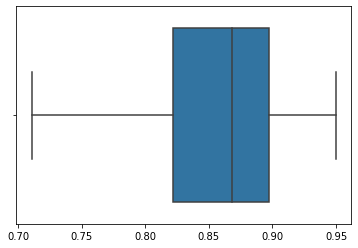

In [116]:
#boxplot to check the cv results
model_scores = model_scores.append({"name": "Regularized Normal Tree w/sample","cv": cv_accuracy},ignore_index=True)
sns.boxplot(cv_accuracy)

In [117]:
##Looks like min sample has more influence in this case (probably because of the less no of records)
#Lets do a grid search and see if we can get the best value
param_list = {"min_samples_leaf" : [x for x in range(3,9)]}

In [118]:
#Initialize and fit the data
gsv = GridSearchCV(tm_depth,param_grid=param_list,cv=5)

gsv.fit(X_train,y_train)

C:\Users\rejimonr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=9999,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': [3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=F

In [119]:
#Actual results
gsv.cv_results_

{'mean_fit_time': array([0.0014739 , 0.00160131, 0.00159607, 0.0016036 , 0.00139732,
        0.00119548]),
 'std_fit_time': array([0.00042939, 0.00049539, 0.00047538, 0.00049515, 0.00048934,
        0.00039993]),
 'mean_score_time': array([0.00100837, 0.00119619, 0.00139122, 0.00059056, 0.00039911,
        0.00079846]),
 'std_score_time': array([9.56126874e-06, 4.01835837e-04, 8.02544128e-04, 4.82309837e-04,
        4.88811234e-04, 3.99234114e-04]),
 'param_min_samples_leaf': masked_array(data=[3, 4, 5, 6, 7, 8],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_leaf': 3},
  {'min_samples_leaf': 4},
  {'min_samples_leaf': 5},
  {'min_samples_leaf': 6},
  {'min_samples_leaf': 7},
  {'min_samples_leaf': 8}],
 'split0_test_score': array([0.92857143, 0.92857143, 0.92857143, 0.92857143, 0.92857143,
        0.92857143]),
 'split1_test_score': array([0.82142857, 0.82142857, 0.82142857, 0.82142857, 0.821

In [120]:
#Get the best parameters
gsv.best_params_

#Lets go back and run using 9 and see what happens

{'min_samples_leaf': 3}

In [121]:
#Best score seen
gsv.best_score_

0.8676470588235294

In [122]:
##Check the tree model characteristics and feature importances
print("Regualized Tree Feature Importances with best features\n")
pd.DataFrame(tm_sample.feature_importances_,columns=["Feat Imp Value"],index=X.columns)\
.sort_values("Feat Imp Value",ascending=False)

Regualized Tree Feature Importances with best features



,Feat Imp Value
PPE,0.328659
MDVP:Shimmer,0.235167
MDVP:Fo(Hz),0.224895
MDVP:Jitter(Abs),0.121957
D2,0.072533
MDVP:Fhi(Hz),0.016789
MDVP:Flo(Hz),0.000000
NHR,0.000000
HNR,0.000000
RPDE,0.000000


#### Q8 Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [123]:
##Lets now use the ensemble model Random Forest Classifier
#We will start with a guess for no of trees and features
rf = RandomForestClassifier(criterion="entropy",n_estimators=100,n_jobs=2,max_features=5,random_state=seed)

In [124]:
#Fit and evaluate
rf.fit(X_train,y_train)

#Keep for later evaluation
y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)


print("Random Forest Classifier:\n")
print(f"Overall Training Data Accuracy Score {accuracy_score(y_train,y_pred_rf_train) : 0.3f}")
print(f"Overall Test Accuracy Score {accuracy_score(y_test,y_pred_rf) :0.3f}")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rf))
print("Classfication Metrics: \n",classification_report(y_test,y_pred_rf))

Random Forest Classifier:

Overall Training Data Accuracy Score  1.000
Overall Test Accuracy Score 0.864
Confusion Matrix: 
 [[13  6]
 [ 2 38]]
Classfication Metrics: 
               precision    recall  f1-score   support

           0       0.87      0.68      0.76        19
           1       0.86      0.95      0.90        40

    accuracy                           0.86        59
   macro avg       0.87      0.82      0.83        59
weighted avg       0.86      0.86      0.86        59



In [126]:
#Cross validation to check the performance..we will use 
rskfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=seed)
cv_accuracy_rf = cross_val_score(rf,X,y,cv=rskfold,scoring="accuracy")
cv_recall_rf = cross_val_score(rf,X,y,cv=rskfold,scoring="recall")
print("Cross Validation Accuracy Results: \n",cv_accuracy_rf)
print("Cross Validation Recall Results: \n",cv_recall_rf)

Cross Validation Accuracy Results: 
 [0.95       0.9        0.94871795 0.86842105 0.86842105 0.9
 0.9        0.94871795 0.86842105 0.92105263 0.925      0.925
 0.87179487 0.89473684 0.89473684 0.975      0.9        0.8974359
 0.89473684 0.94736842 0.925      0.9        0.94871795 0.89473684
 0.97368421 0.925      0.925      0.8974359  0.94736842 0.86842105
 0.9        0.95       0.87179487 0.86842105 0.86842105 0.9
 0.875      0.97435897 0.89473684 0.92105263 0.95       0.85
 0.8974359  0.94736842 0.84210526 0.875      1.         0.8974359
 0.89473684 0.86842105]
Cross Validation Recall Results: 
 [1.         1.         0.96551724 0.93103448 0.96551724 1.
 0.93333333 0.96551724 0.89655172 0.96551724 0.96666667 1.
 1.         0.93103448 0.89655172 1.         0.96666667 0.96551724
 0.93103448 0.96551724 0.96666667 1.         0.96551724 1.
 0.96551724 1.         0.93333333 0.93103448 1.         0.93103448
 0.96666667 1.         1.         0.89655172 0.96551724 0.96666667
 0.96666667 0.965

In [127]:
#Get the average cross validated scores and std. deviation
print(f"Average cross validated accuracy score : {cv_accuracy_rf.mean() : .3}")
print(f"Std. Deviation cross validated accuracy score : {cv_accuracy_rf.std() : .3}")

print(f"Average cross validated recall score : {cv_recall_rf.mean() : .3}")
print(f"Std. Deviation cross validated recall score : {cv_recall_rf.std() : .3}")

#Accuracy is now around 90% which is an improvement
#Recall has also shown an improvement

Average cross validated accuracy score :  0.909
Std. Deviation cross validated accuracy score :  0.0357
Average cross validated recall score :  0.965
Std. Deviation cross validated recall score :  0.034


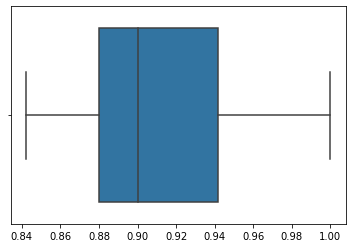

In [128]:
#boxplot to check the cv results
model_scores = model_scores.append({"name": "Random Forest","cv": cv_accuracy_rf},ignore_index=True)
sns.boxplot(cv_accuracy_rf)

In [129]:
##Check the tree model characteristics and feature importances
print("Feature Importances for Random Forest Classifier\n")
pd.DataFrame(rf.feature_importances_,columns=["Feat Imp Value"],index=X.columns)\
.sort_values("Feat Imp Value",ascending=False)

#All the features were also used since we we had set the features are picked at random

Feature Importances for Random Forest Classifier



,Feat Imp Value
PPE,0.195592
MDVP:Fo(Hz),0.186960
MDVP:Shimmer,0.121364
spread2,0.094231
MDVP:Flo(Hz),0.066128
MDVP:Fhi(Hz),0.064995
NHR,0.059601
D2,0.052585
DFA,0.051023
RPDE,0.042587


In [130]:
#Lets define some parameters and start a gridsearch to see if we can get a better model

param_list = {"max_features": [x for x in range(2,12)],
              "n_estimators" : [x for x in range(100,300,10)]}

In [131]:
#Initialize the gridsearch estimator
gsv = GridSearchCV(rf,param_grid=param_list,cv=5)

In [132]:
#Start the search
gsv.fit(X_train,y_train)

#This is time consuming and should be tried with caution

C:\Users\rejimonr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=5,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=2,
                                              oob_score=False,
                                              random_state=9999, verbose=0,
                                              warm_start=False),
             iid='warn',

In [133]:
#Get the best score seen in the grid search
gsv.best_score_

0.9117647058823529

In [134]:
#Get the best parameters from the grid search
gsv.best_params_

{'max_features': 7, 'n_estimators': 130}

In [135]:
#Lets rerun the RF model again with the best estimator we got from above and see what happens to the results
#best_rf = gsv.best_estimator_

####### Best accuracy is coming from 130 trees

best_rf = RandomForestClassifier(criterion="entropy",n_estimators=130,n_jobs=2,max_features=7,random_state=seed)

#Fit and evaluate
best_rf.fit(X_train,y_train)

#Keep for later evaluation
y_pred_rf_best = best_rf.predict(X_test)

y_pred_rf_best_train = best_rf.predict(X_train)

print("Random ForestClassifier with best parameters:\n")
print(f"Overall Train Accuracy Score {accuracy_score(y_train,y_pred_rf_best_train) :0.3f}")
print(f"Overall Test Accuracy Score {accuracy_score(y_test,y_pred_rf_best) :0.3f}")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_rf_best))
print("Classfication Metrics: \n",classification_report(y_test,y_pred_rf_best))

#Accuracy at 89% now..
#Recall value is around 95%
#Training accuracy score will be 1 as all the records have been seen by RF

Random ForestClassifier with best parameters:

Overall Train Accuracy Score 1.000
Overall Test Accuracy Score 0.898
Confusion Matrix: 
 [[15  4]
 [ 2 38]]
Classfication Metrics: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.90      0.95      0.93        40

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



In [136]:
#Cross validation to check the average scores

rskfold = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state=seed)
cv_accuracy_rf_best = cross_val_score(best_rf,X,y,cv=rskfold,scoring="accuracy")
cv_recall_rf_best = cross_val_score(best_rf,X,y,cv=rskfold,scoring="recall")
print("Cross Validation Accuracy Results: \n",cv_accuracy_rf_best)
print("Cross Validation Recall Results: \n",cv_recall_rf_best)

Cross Validation Accuracy Results: 
 [0.95       0.925      0.97435897 0.86842105 0.86842105 0.925
 0.9        0.94871795 0.86842105 0.86842105 0.925      0.925
 0.92307692 0.89473684 0.89473684 0.95       0.9        0.8974359
 0.94736842 0.94736842 0.925      0.9        0.94871795 0.92105263
 0.94736842 0.9        0.925      0.92307692 0.94736842 0.89473684
 0.9        0.925      0.87179487 0.84210526 0.89473684 0.875
 0.875      0.97435897 0.89473684 0.92105263 0.95       0.825
 0.92307692 0.94736842 0.86842105 0.925      0.975      0.87179487
 0.76315789 0.89473684]
Cross Validation Recall Results: 
 [1.         0.96666667 1.         0.93103448 0.93103448 1.
 0.93333333 0.96551724 0.89655172 0.96551724 0.96666667 1.
 1.         0.93103448 0.89655172 1.         0.96666667 0.96551724
 1.         0.96551724 0.96666667 1.         0.96551724 1.
 0.96551724 1.         0.93333333 0.96551724 1.         0.96551724
 0.9        0.96666667 0.96551724 0.86206897 0.96551724 0.93333333
 0.96666667

In [137]:
#Get the average cross validated scores and std. deviation
print(f"Average cross validated accuracy score : {cv_accuracy_rf_best.mean() : .3}")
print(f"Std. Deviation cross validated accuracy score : {cv_accuracy_rf_best.std() : .3}")

print(f"Average cross validated recall score : {cv_recall_rf_best.mean() : .3}")
print(f"Std. Deviation cross validated recall score : {cv_recall_rf_best.std() : .3}")

#The accuracy of RF model is higher by a slight margin and recall value is for sure higher

Average cross validated accuracy score :  0.909
Std. Deviation cross validated accuracy score :  0.0398
Average cross validated recall score :  0.96
Std. Deviation cross validated recall score :  0.0445


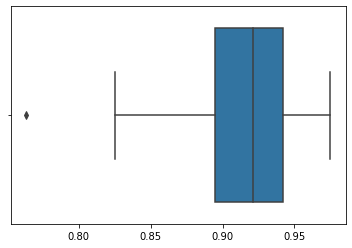

In [138]:
#box plot to check the scores
model_scores = model_scores.append({"name": "Random Forest w/best parameters","cv": cv_accuracy_rf_best},ignore_index=True)
sns.boxplot(cv_accuracy_rf_best)

In [139]:
##Check the tree model characteristics and feature importances
print("Feature Importances for Random Forest Classifier\n")
pd.DataFrame(best_rf.feature_importances_,columns=["Feat Imp Value"],index=X.columns)\
.sort_values("Feat Imp Value",ascending=False)

#All the features were also used since we we had set the features are picked at random

Feature Importances for Random Forest Classifier



,Feat Imp Value
PPE,0.210755
MDVP:Fo(Hz),0.183155
MDVP:Shimmer,0.137419
spread2,0.084296
MDVP:Fhi(Hz),0.075392
MDVP:Flo(Hz),0.068358
D2,0.054026
NHR,0.048761
DFA,0.039595
HNR,0.038537


In [140]:
#Lets visualize the OOB error to see what could be the best tree count keeping other parameters same
#Just to get an idea
rfe = RandomForestClassifier(criterion="entropy",n_jobs=2,n_estimators=130,max_features=7,\
                             random_state=seed,oob_score=True,warm_start=True)

In [141]:
#Initialize the range of values to be tried

min_estimators = 100
max_estimators = 200
oob_error = []

In [142]:
#Iterate over the range and capture the error rate from oob samples
for e in range(min_estimators,max_estimators +1):
    rfe.set_params(n_estimators=e)
    rfe.fit(X_train,y_train)
    oob_error.append(1 - rfe.oob_score_)

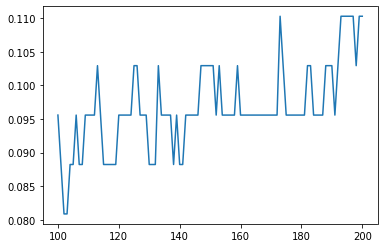

In [143]:
#Visualize the error rates
plt.plot(range(min_estimators,max_estimators +1),oob_error)

#Error rate seem to be lower between 100 and 140. We got 130 from our gridsearch cross validated results

In [144]:
#Lets visualize the OOB error to see what could be the best max_features keeping other parameters same
rfe = RandomForestClassifier(criterion="entropy",n_jobs=2,n_estimators=130,max_features=7,\
                             random_state=seed,oob_score=True,warm_start=False)

In [145]:
min_feat = 2
max_feat = 12
oob_error = []

In [146]:
for f in range(min_feat,max_feat +1):
    rfe.set_params(max_features=f)
    rfe.fit(X_train,y_train)
    oob_error.append(1 - rfe.oob_score_)

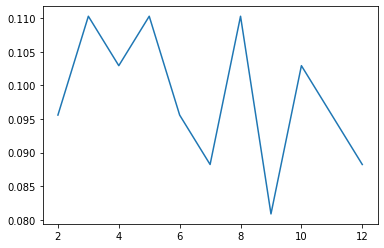

In [147]:
plt.plot(range(min_feat,max_feat +1),oob_error)

#Lowest seems to be 9..we got 7 in out gridsearch cross validated results
#sqrt if no of features is approx 3/4 and error is lower there as well

In [148]:
model_scores["name"] = model_scores["name"].astype("category")

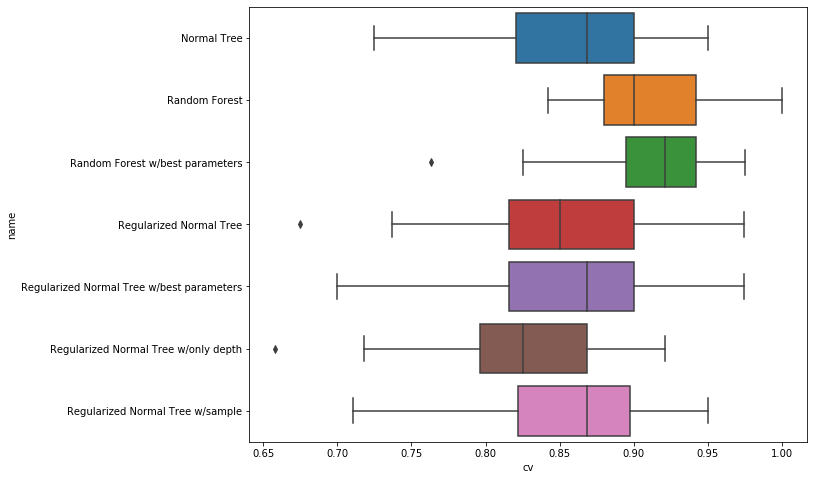

In [149]:
###Final comparison of all the model cv results for accuracy
plt.figure(figsize=(10,8))
sns.boxplot(x=model_scores["cv"],y=model_scores["name"])

##We can see that the regularized tree with both max_depth and min_samples perform well on accuracy similar to the
#full tree but with less no of features and reduced overfitting. 
#We can also observe that the min_leaf parameter alone gives similar performance
#As explained the no of records is less and therefore depth is not very influential in controlling the accuracy

#The Random Forest is increasing the accuracy and we can also see the variance reduced for accuracy.
#We got good results for 130 trees using 7 features at a time for each node split